# Data Intensive Computing - Project Phase 2

### Building and Evaluating Machine Learning Models

In [1]:
%%html
<style>
    div.output_stderr {
    display: none;
}
</style>

In [2]:
import sys

print(sys.version)

3.7.9 (v3.7.9:13c94747c7, Aug 15 2020, 01:31:08) 
[Clang 6.0 (clang-600.0.57)]


In [3]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error,  r2_score, mean_squared_log_error
from sklearn.linear_model import LassoCV,RidgeCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn import tree


import warnings
warnings.filterwarnings('ignore')


In [4]:
# Loading dataset after doing feature selection
used_cars_df = pd.read_csv(
    filepath_or_buffer="cleaned_version2_used_cars.csv",
    header=0,
    usecols=[
        "seller", 
        "offerType", 
        "abtest",
        "vehicleType",
        "yearOfRegistration",
        "gearbox",
        "model",
        "fuelType",
        "brand",
        "notRepairedDamage",
        "lastSeen_year",
        "age_of_car",
        "powerPS_scaled",
        "kilometer_scaled",
        "price"     
    ]
)

print(used_cars_df.shape)
used_cars_df.head()

(183480, 15)


,seller,offerType,abtest,vehicleType,yearOfRegistration,gearbox,model,fuelType,brand,notRepairedDamage,lastSeen_year,age_of_car,powerPS_scaled,kilometer_scaled,price
0,private,listing,control,others,1997,manual,golf,benzine,volkswagen,no,2016,19,0.294118,1.0,550.0
1,private,listing,test,kombi,1999,manual,focus,diesel,ford,no,2016,17,0.352941,1.0,1599.0
2,private,listing,test,limousine,2007,manual,golf,diesel,volkswagen,no,2016,9,0.352941,1.0,4500.0
3,private,listing,test,limousine,1998,manual,e_klasse,benzine,mercedes_benz,no,2016,18,0.666667,1.0,2599.0
4,private,listing,test,bus,2004,manual,transit,diesel,ford,no,2016,12,0.000000,1.0,3300.0


In [5]:
# Since we have generated new feature called `age_of_car` from `yearOfRegistration` and `lastSeen_year`,
# therefore, we can remove `yearOfRegistration` and `lastSeen_year`

used_cars_df = used_cars_df.drop(["yearOfRegistration", "lastSeen_year"], axis=1)

print(used_cars_df.shape)
used_cars_df.head()

(183480, 13)


,seller,offerType,abtest,vehicleType,gearbox,model,fuelType,brand,notRepairedDamage,age_of_car,powerPS_scaled,kilometer_scaled,price
0,private,listing,control,others,manual,golf,benzine,volkswagen,no,19,0.294118,1.0,550.0
1,private,listing,test,kombi,manual,focus,diesel,ford,no,17,0.352941,1.0,1599.0
2,private,listing,test,limousine,manual,golf,diesel,volkswagen,no,9,0.352941,1.0,4500.0
3,private,listing,test,limousine,manual,e_klasse,benzine,mercedes_benz,no,18,0.666667,1.0,2599.0
4,private,listing,test,bus,manual,transit,diesel,ford,no,12,0.000000,1.0,3300.0


In [6]:
used_cars_df.describe()

,age_of_car,powerPS_scaled,kilometer_scaled,price
count,183480.000000,183480.000000,183480.000000,183480.000000
mean,12.860830,0.458712,0.851896,4423.166956
std,4.094547,0.200701,0.292252,4084.513183
min,-2.000000,0.000000,0.000000,0.000000
25%,10.000000,0.298039,1.000000,1400.000000
50%,13.000000,0.454902,1.000000,2999.000000
75%,16.000000,0.588235,1.000000,6200.000000
max,20.000000,1.000000,1.000000,20470.000000


In [7]:
# Since our dataset is huge, we cannot run algorithms on our local and do hyperparamter tuning.
# Therefore, we are reducing the size of that dataset.
filtered_used_cars_df = used_cars_df[(used_cars_df["age_of_car"] >= 0) & (used_cars_df["age_of_car"] <= 10)]

print(filtered_used_cars_df.shape)


(57122, 13)


In [8]:
filtered_used_cars_df.to_csv("./filtered_data.csv")

In [8]:
# Scaling age of car feature
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
filtered_used_cars_df[["age_of_car_scaled"]] = scaler.fit_transform(filtered_used_cars_df[["age_of_car"]])

filtered_used_cars_df = filtered_used_cars_df.drop(["age_of_car"], axis=1)

print(filtered_used_cars_df.shape)
filtered_used_cars_df.head()

(57122, 13)


,seller,offerType,abtest,vehicleType,gearbox,model,fuelType,brand,notRepairedDamage,powerPS_scaled,kilometer_scaled,price,age_of_car_scaled
2,private,listing,test,limousine,manual,golf,diesel,volkswagen,no,0.352941,1.000000,4500.0,0.9
7,private,listing,test,limousine,manual,mondeo,diesel,ford,no,0.549020,1.000000,7300.0,0.8
11,private,listing,test,bus,manual,transporter,diesel,volkswagen,no,0.513725,0.583333,13900.0,0.7
13,private,listing,test,kombi,manual,passat,diesel,volkswagen,no,0.549020,1.000000,7450.0,1.0
14,private,listing,test,kombi,automatic,signum,diesel,opel,no,0.588235,0.583333,7600.0,1.0


In [20]:
filtered_used_cars_df["model"].unique()

array(['golf', 'mondeo', 'transporter', 'passat', 'signum', 'fabia',
       'vivaro', '1er', 'fortwo', 'getz', 'a_klasse', 'b_klasse',
       'e_klasse', 'octavia', '3_reihe', 'bravo', 'tiguan', 'a4',
       'accord', 'galaxy', '147', 'andere', '3er', '2_reihe', 'touran',
       '5_reihe', 'a6', 'viano', 'outlander', 'c4', 'focus', 'c1',
       'megane', 'tt', 'modus', 'astra', 'clio', 'duster', 'stilo',
       'superb', 'sprinter', 'zafira', 'fiesta', 'panda', 'c_klasse',
       'ibiza', '4_reihe', 'kuga', 'a3', 'forfour', 'altea', 's_max',
       'caddy', 'a1', '5er', 'twingo', 'polo', 'eos', 'transit', 'leon',
       'a5', 'insignia', 'cooper', 'i_reihe', 'm_klasse', '300c', 'micra',
       'scirocco', 'corsa', 'vectra', 'avensis', 'beetle', 'exeo',
       '1_reihe', '6_reihe', 'c5', 'cr_reihe', 'punto', 'berlingo',
       'x_reihe', 'touareg', 'qashqai', 'vito', 'sirion', 'jazz',
       'clubman', 'cc', 'fusion', 'auris', 'rx_reihe', 'range_rover',
       'sportage', 'picanto', 'sl

In [10]:
# Encoding categorical values
categorical_columns = [
    "seller", 
    "offerType",
    "abtest",
    "vehicleType",
    "gearbox",
    "model",
    "fuelType",
    "brand",
    "notRepairedDamage"
]

encoded_used_cars_df = pd.get_dummies(filtered_used_cars_df, columns=categorical_columns)

encoded_used_cars_df.shape

(57122, 286)

In [11]:
used_cars_features = encoded_used_cars_df.loc[:, encoded_used_cars_df.columns != "price"]


used_cars_target = encoded_used_cars_df["price"]


X_train, X_test, y_train, y_test = train_test_split(
    used_cars_features, 
    used_cars_target, 
    test_size=0.2, 
    random_state=22
)

## Decision Tree Regressor

In [12]:
def get_result_metrics(y_test, y_pred):
    results = []
    
    results.append("%.5f" % r2_score(y_test,y_pred))
    results.append("%.5f" % (r2_score(y_test,y_pred) * 100))
    results.append("%.5f" % mean_squared_error(y_test, y_pred))
    results.append("%.5f" % mean_absolute_error(y_test, y_pred))
    results.append("%.5f" % np.sqrt(mean_squared_error(y_test, y_pred)))    
    return (results)


score_data_baseline = pd.DataFrame(
    index=[
        "R2_Score", 
        "Accuracy", 
        "Mean_Squared_Error", 
        "Mean_Absolute_Error", 
        "Root_MSE"
    ]
)

score_data_tuned = pd.DataFrame(
    index=[
        "R2_Score", 
        "Accuracy", 
        "Mean_Squared_Error", 
        "Mean_Absolute_Error", 
        "Root_MSE"
    ]
)


In [13]:
# Baseline Model

dt_model_baseline = DecisionTreeRegressor()
dt_model_baseline.fit(X_train, y_train)

dt_baseline_pred = dt_model_baseline.predict(X_test)

dt_baseline_scores = get_result_metrics(y_test, dt_baseline_pred)

score_data_baseline["Decision Tree Regressor"] = dt_baseline_scores

print("R2 score - Decision Tree Regression (Baseline):", dt_baseline_scores[0])
print("Mean squared error - Decision Tree Regression (Baseline):", dt_baseline_scores[2])
print("Mean absolute error - Decision Tree Regression (Baseline):", dt_baseline_scores[3])
print("Root mean squared error - Decision Tree Regression (Baseline):", dt_baseline_scores[4])

R2 score - Decision Tree Regression (Baseline): 0.72380
Mean squared error - Decision Tree Regression (Baseline): 5282202.79548
Mean absolute error - Decision Tree Regression (Baseline): 1512.30791
Root mean squared error - Decision Tree Regression (Baseline): 2298.30433


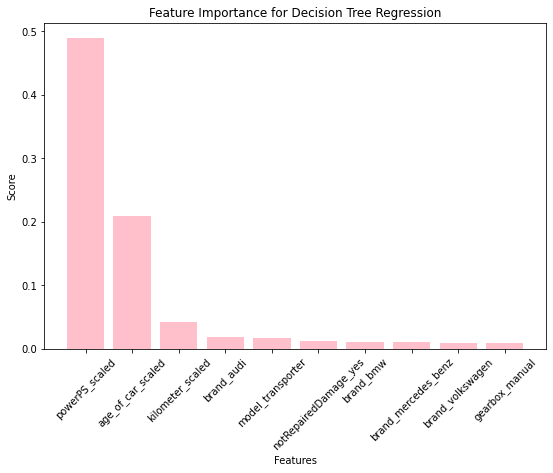

In [44]:
# Taking only top 10 features
dt_feature_importances = dt_model_baseline.feature_importances_
features_names = used_cars_features.columns

sorted_index = np.argsort(dt_feature_importances)[::-1][:10]

dt_feature_importances_top_10 = dt_feature_importances[sorted_index]
feature_names_top_10 = np.array(features_names)[sorted_index]

plt.figure(figsize=(9, 6))
plt.bar(range(len(dt_feature_importances_top_10)), dt_feature_importances_top_10, align="center", color="pink")
plt.xticks(range(len(dt_feature_importances_top_10)), np.array(feature_names_top_10), rotation=45)
plt.xlabel("Features")
plt.ylabel("Score")
plt.title("Feature Importance for Decision Tree Regression")
plt.show()

In [14]:
# Grid Search to find the best value for hyperparameters
import time
# from skopt.space import Real, Integer
# from scipy.stats import uniform, poisson

hyperparameters = {
    "splitter":["best"],
    "max_depth" : [5, 7, 9, None],
    "min_samples_leaf":[1, 3, 5],
    "max_features":["auto", "sqrt", None],
    "max_leaf_nodes":[None, 30, 40, 50, 60, 70] 
}

# create an instance of the grid search object
grid_search_dt = GridSearchCV(
    dt_model_baseline, 
    hyperparameters, 
    cv=10, 
    n_jobs=-1,
    scoring="neg_mean_squared_error",
    verbose=3
)

# conduct grid search over the parameter space
start_time = time.time()

grid_search_dt.fit(X_train, y_train)

duration = time.time() - start_time

# show best parameter configuration found for regressor
dt_best_parameters = grid_search_dt.best_params_
print("\n", dt_best_parameters)
print(f"Time taken in minutes: {duration / 60}")

Fitting 10 folds for each of 216 candidates, totalling 2160 fits
[CV 3/10] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=-7257137.428 total time=   1.7s
[CV 10/10] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=-7497107.712 total time=   1.1s
[CV 8/10] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, splitter=best;, score=-7423186.674 total time=   1.0s
[CV 6/10] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, splitter=best;, score=-7306523.588 total time=   1.2s
[CV 4/10] END max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, splitter=best;, score=-7179030.033 total time=   1.4s
[CV 2/10] END max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, splitter=best;, score=-7293004.489 total time=   1.2s
[CV 10/10] END max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, splitt

[CV 4/10] END max_depth=5, max_features=None, max_leaf_nodes=50, min_samples_leaf=3, splitter=best;, score=-7173813.976 total time=   1.1s[CV 4/10] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=-7173813.976 total time=   1.7s
[CV 3/10] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, splitter=best;, score=-7257137.428 total time=   1.1s
[CV 10/10] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, splitter=best;, score=-7497107.712 total time=   1.0s
[CV 8/10] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, splitter=best;, score=-7423914.025 total time=   1.2s
[CV 5/10] END max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, splitter=best;, score=-7186201.973 total time=   1.4s
[CV 3/10] END max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, splitter=best;, score=-7252917.139 total time=   1.2s
[CV 1/10] END max_d

[CV 10/10] END max_depth=5, max_features=None, max_leaf_nodes=50, min_samples_leaf=3, splitter=best;, score=-7497107.712 total time=   1.1s[CV 7/10] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=-7585155.074 total time=   1.8s
[CV 5/10] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, splitter=best;, score=-7156748.415 total time=   1.2s
[CV 3/10] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, splitter=best;, score=-7256106.283 total time=   1.1s
[CV 1/10] END max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, splitter=best;, score=-7511713.342 total time=   1.3s
[CV 9/10] END max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, splitter=best;, score=-7159024.746 total time=   1.3s
[CV 7/10] END max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, splitter=best;, score=-7635328.415 total time=   1.2s
[CV 5/10] END max_dep

[CV 7/10] END max_depth=5, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, splitter=best;, score=-7595437.422 total time=   1.1s
[CV 5/10] END max_depth=5, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, splitter=best;, score=-7169884.465 total time=   1.1s
[CV 3/10] END max_depth=5, max_features=None, max_leaf_nodes=50, min_samples_leaf=3, splitter=best;, score=-7257137.428 total time=   1.1s
[CV 1/10] END max_depth=5, max_features=None, max_leaf_nodes=50, min_samples_leaf=5, splitter=best;, score=-7487954.417 total time=   1.1s
[CV 6/10] END max_depth=5, max_features=None, max_leaf_nodes=50, min_samples_leaf=5, splitter=best;, score=-7306523.588 total time=   1.0s
[CV 4/10] END max_depth=5, max_features=None, max_leaf_nodes=60, min_samples_leaf=1, splitter=best;, score=-7173813.976 total time=   1.1s
[CV 2/10] END max_depth=5, max_features=None, max_leaf_nodes=60, min_samples_leaf=3, splitter=best;, score=-7283923.770 total time=   1.1s
[CV 10/10] END max_depth=5,

[CV 5/10] END max_depth=7, max_features=None, max_leaf_nodes=30, min_samples_leaf=1, splitter=best;, score=-7074316.969 total time=   1.3s
[CV 1/10] END max_depth=5, max_features=None, max_leaf_nodes=60, min_samples_leaf=1, splitter=best;, score=-7487954.417 total time=   1.1s
[CV 10/10] END max_depth=5, max_features=None, max_leaf_nodes=60, min_samples_leaf=1, splitter=best;, score=-7497107.712 total time=   1.2s
[CV 7/10] END max_depth=5, max_features=None, max_leaf_nodes=60, min_samples_leaf=3, splitter=best;, score=-7585155.074 total time=   1.1s
[CV 6/10] END max_depth=5, max_features=None, max_leaf_nodes=60, min_samples_leaf=5, splitter=best;, score=-7306523.588 total time=   1.1s
[CV 4/10] END max_depth=5, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, splitter=best;, score=-7173813.976 total time=   1.1s
[CV 2/10] END max_depth=5, max_features=None, max_leaf_nodes=70, min_samples_leaf=3, splitter=best;, score=-7283923.770 total time=   1.1s
[CV 10/10] END max_depth=5

[CV 4/10] END max_depth=7, max_features=None, max_leaf_nodes=30, min_samples_leaf=1, splitter=best;, score=-7077011.612 total time=   1.3s
[CV 8/10] END max_depth=5, max_features=None, max_leaf_nodes=50, min_samples_leaf=5, splitter=best;, score=-7423914.025 total time=   1.0s
[CV 5/10] END max_depth=5, max_features=None, max_leaf_nodes=60, min_samples_leaf=1, splitter=best;, score=-7169884.465 total time=   1.2s
[CV 3/10] END max_depth=5, max_features=None, max_leaf_nodes=60, min_samples_leaf=3, splitter=best;, score=-7257137.428 total time=   1.2s
[CV 2/10] END max_depth=5, max_features=None, max_leaf_nodes=60, min_samples_leaf=5, splitter=best;, score=-7283923.770 total time=   1.0s
[CV 9/10] END max_depth=5, max_features=None, max_leaf_nodes=60, min_samples_leaf=5, splitter=best;, score=-7138118.406 total time=   1.1s
[CV 8/10] END max_depth=5, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, splitter=best;, score=-7423186.674 total time=   1.1s
[CV 6/10] END max_depth=5, 

[CV 5/10] END max_depth=7, max_features=None, max_leaf_nodes=30, min_samples_leaf=3, splitter=best;, score=-7074316.969 total time=   1.6s
[CV 9/10] END max_depth=5, max_features=None, max_leaf_nodes=50, min_samples_leaf=5, splitter=best;, score=-7138118.406 total time=   1.1s
[CV 7/10] END max_depth=5, max_features=None, max_leaf_nodes=60, min_samples_leaf=1, splitter=best;, score=-7585155.074 total time=   1.2s
[CV 5/10] END max_depth=5, max_features=None, max_leaf_nodes=60, min_samples_leaf=3, splitter=best;, score=-7156748.415 total time=   1.2s
[CV 3/10] END max_depth=5, max_features=None, max_leaf_nodes=60, min_samples_leaf=5, splitter=best;, score=-7256106.283 total time=   1.1s
[CV 1/10] END max_depth=5, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, splitter=best;, score=-7487954.417 total time=   1.1s
[CV 9/10] END max_depth=5, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, splitter=best;, score=-7141952.803 total time=   1.1s
[CV 7/10] END max_depth=5, 

[CV 7/10] END max_depth=7, max_features=None, max_leaf_nodes=30, min_samples_leaf=3, splitter=best;, score=-7430833.066 total time=   1.6s
[CV 4/10] END max_depth=7, max_features=None, max_leaf_nodes=30, min_samples_leaf=3, splitter=best;, score=-7077011.612 total time=   1.6s
[CV 2/10] END max_depth=7, max_features=None, max_leaf_nodes=30, min_samples_leaf=5, splitter=best;, score=-7088475.300 total time=   1.5s
[CV 9/10] END max_depth=7, max_features=None, max_leaf_nodes=30, min_samples_leaf=5, splitter=best;, score=-6981060.249 total time=   1.4s
[CV 7/10] END max_depth=7, max_features=None, max_leaf_nodes=40, min_samples_leaf=1, splitter=best;, score=-7239643.057 total time=   1.5s
[CV 5/10] END max_depth=7, max_features=None, max_leaf_nodes=40, min_samples_leaf=3, splitter=best;, score=-6751549.788 total time=   1.4s
[CV 3/10] END max_depth=7, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, splitter=best;, score=-6872742.988 total time=   1.5s
[CV 1/10] END max_depth=7, 

[CV 3/10] END max_depth=9, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, splitter=best;, score=-6861711.460 total time=   1.5s
[CV 1/10] END max_depth=9, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, splitter=best;, score=-7005777.438 total time=   1.7s
[CV 9/10] END max_depth=9, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, splitter=best;, score=-6707306.883 total time=   1.6s
[CV 7/10] END max_depth=9, max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, splitter=best;, score=-7247237.917 total time=   1.6s
[CV 5/10] END max_depth=9, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, splitter=best;, score=-6592386.176 total time=   1.6s
[CV 3/10] END max_depth=9, max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, splitter=best;, score=-6650695.318 total time=   1.7s
[CV 1/10] END max_depth=9, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, splitter=best;, score=-6766091.904 total time=   1.6s
[CV 9/10] END max_depth=9, 

[CV 7/10] END max_depth=9, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, splitter=best;, score=-7430833.066 total time=   1.4s
[CV 5/10] END max_depth=9, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, splitter=best;, score=-7074316.969 total time=   1.3s
[CV 3/10] END max_depth=9, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, splitter=best;, score=-7185711.569 total time=   1.3s
[CV 2/10] END max_depth=9, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, splitter=best;, score=-6877730.078 total time=   1.5s
[CV 10/10] END max_depth=9, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, splitter=best;, score=-7163883.916 total time=   1.7s
[CV 8/10] END max_depth=9, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, splitter=best;, score=-7040914.560 total time=   1.6s
[CV 6/10] END max_depth=9, max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, splitter=best;, score=-6814099.191 total time=   1.5s
[CV 4/10] END max_depth=9,

[CV 2/10] END max_depth=9, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, splitter=best;, score=-6515685.731 total time=   1.7s
[CV 9/10] END max_depth=9, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, splitter=best;, score=-6417531.338 total time=   1.8s
[CV 8/10] END max_depth=9, max_features=auto, max_leaf_nodes=60, min_samples_leaf=5, splitter=best;, score=-6719171.929 total time=   1.7s
[CV 6/10] END max_depth=9, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, splitter=best;, score=-6407071.649 total time=   1.8s
[CV 4/10] END max_depth=9, max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, splitter=best;, score=-6529274.608 total time=   2.0s
[CV 1/10] END max_depth=9, max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, splitter=best;, score=-6509446.869 total time=   1.9s
[CV 9/10] END max_depth=9, max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, splitter=best;, score=-6244238.490 total time=   1.9s
[CV 3/10] END max_depth=9, 

[CV 6/10] END max_depth=9, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=3, splitter=best;, score=-11052247.991 total time=   0.5s
 {'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 5, 'splitter': 'best'}
Time taken in minutes: 5.797876238822937


In [15]:
dt_tuned_model = grid_search_dt.best_estimator_
dt_tuned_pred = dt_tuned_model.predict(X_test)

dt_tuned_scores = get_result_metrics(y_test, dt_tuned_pred)

score_data_tuned["Decision Tree Regressor"] = dt_tuned_scores

print("R2 score - Decision Tree Regression (Tuned):", dt_tuned_scores[0])
print("Mean squared error - Decision Tree Regression (Tuned):", dt_tuned_scores[2])
print("Mean absolute error - Decision Tree Regression (Tuned):", dt_tuned_scores[3])
print("Root mean squared error - Decision Tree Regression (Tuned):", dt_tuned_scores[4])

R2 score - Decision Tree Regression (Tuned): 0.75961
Mean squared error - Decision Tree Regression (Tuned): 4597298.98101
Mean absolute error - Decision Tree Regression (Tuned): 1485.00519
Root mean squared error - Decision Tree Regression (Tuned): 2144.13129


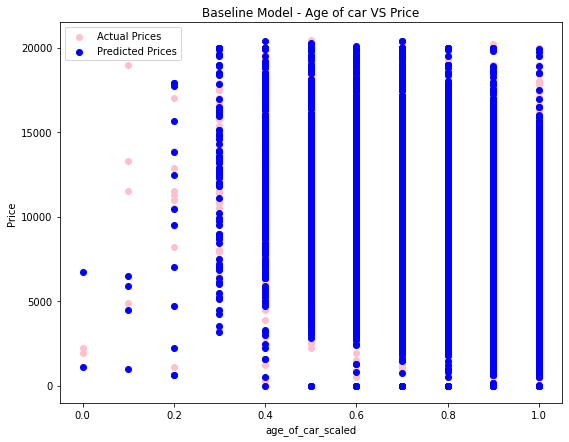

In [16]:
# Baseline Model - Lets visualize how our model predicts price of a car when visualize with only one feature

plt.figure(figsize=(9, 7))
plt.scatter(X_test["age_of_car_scaled"], y_test, color="pink", label="Actual Prices")
plt.scatter(X_test["age_of_car_scaled"], dt_baseline_pred, color="blue", label="Predicted Prices")
plt.title("Baseline Model - Age of car VS Price")
plt.xlabel("age_of_car_scaled")
plt.ylabel("Price")
plt.legend()
plt.show()

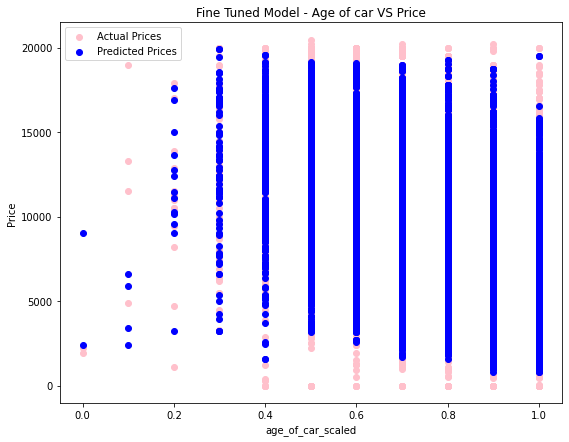

In [17]:
# Baseline Model - Lets visualize how our model predicts price of a car when visualize with only one feature

plt.figure(figsize=(9, 7))
plt.scatter(X_test["age_of_car_scaled"], y_test, color="pink", label="Actual Prices")
plt.scatter(X_test["age_of_car_scaled"], dt_tuned_pred, color="blue", label="Predicted Prices")
plt.title("Fine Tuned Model - Age of car VS Price")
plt.xlabel("age_of_car_scaled")
plt.ylabel("Price")
plt.legend()
plt.show()

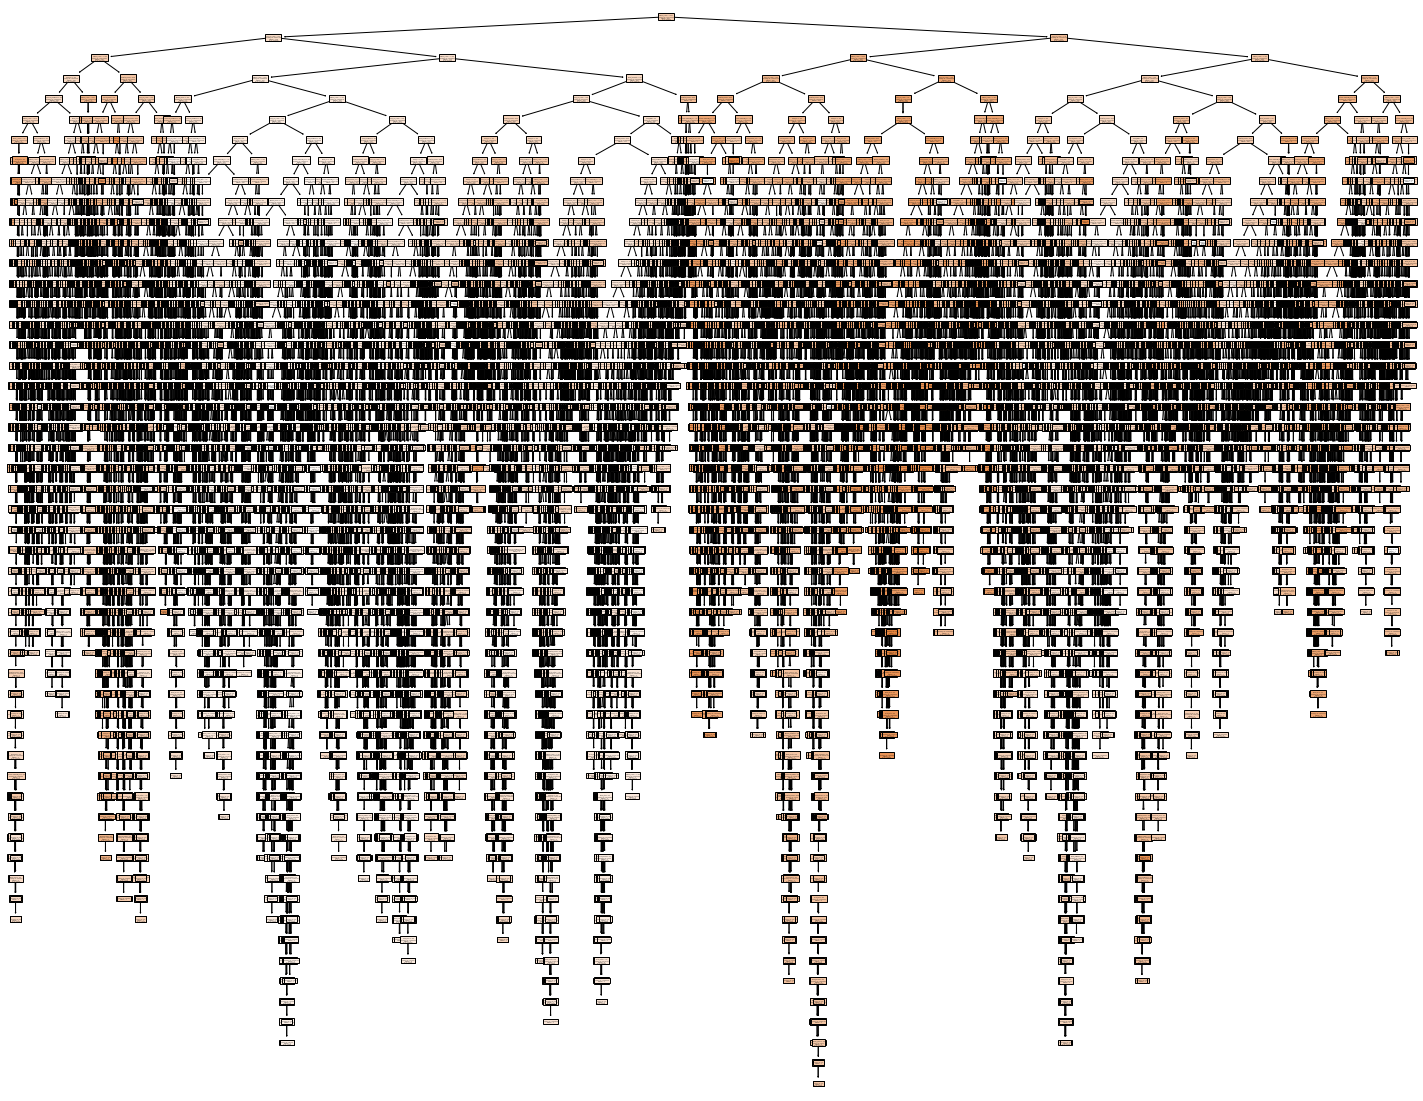

In [19]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_model_baseline, 
                   feature_names=used_cars_features.columns,  
                   class_names="price",
                   filled=True)

## Random Forest Regressor


In [20]:
# Baseline Model

rf_model_baseline = RandomForestRegressor()
rf_model_baseline.fit(X_train, y_train)

rf_baseline_pred = rf_model_baseline.predict(X_test)

rf_baseline_scores = get_result_metrics(y_test, rf_baseline_pred)

score_data_baseline["Random Forest Regressor"] = rf_baseline_scores

print("R2 score - Random Forest Regression (Baseline):", rf_baseline_scores[0])
print("Mean squared error - Random Forest Regression (Baseline):", rf_baseline_scores[2])
print("Mean absolute error - Random Forest Regression (Baseline):", rf_baseline_scores[3])
print("Root mean squared error - Random Forest Regression (Baseline):", rf_baseline_scores[4])


R2 score - Random Forest Regression (Baseline): 0.78830
Mean squared error - Random Forest Regression (Baseline): 4048670.12597
Mean absolute error - Random Forest Regression (Baseline): 1360.23983
Root mean squared error - Random Forest Regression (Baseline): 2012.13074


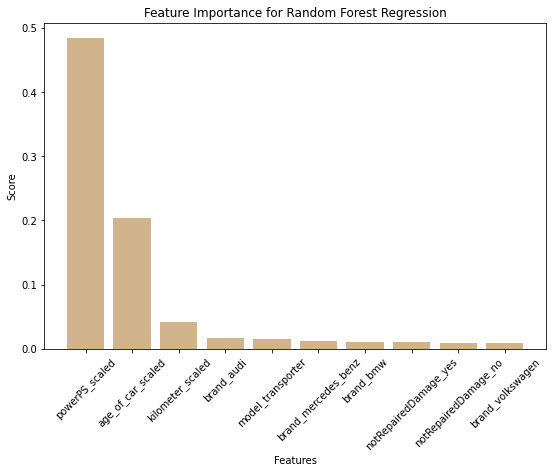

In [47]:
# Taking only top 10 features
rf_feature_importances = rf_model_baseline.feature_importances_
features_names = used_cars_features.columns

sorted_index = np.argsort(rf_feature_importances)[::-1][:10]

rf_feature_importances_top_10 = rf_feature_importances[sorted_index]
feature_names_top_10 = np.array(features_names)[sorted_index]

plt.figure(figsize=(9, 6))
plt.bar(range(len(rf_feature_importances_top_10)), rf_feature_importances_top_10, align="center", color="tan")
plt.xticks(range(len(rf_feature_importances_top_10)), np.array(feature_names_top_10), rotation=45)
plt.xlabel("Features")
plt.ylabel("Score")
plt.title("Feature Importance for Random Forest Regression")
plt.show()

In [22]:
hyperparameters_rf = {
    "n_estimators": [50, 100, 125, 150],
    "max_depth" : [5, 7, 9, None],
    "min_samples_leaf":[1, 3, 5],
    "max_features":["auto", "sqrt", None],
    "max_leaf_nodes":[None, 3, 6, 9],
    "oob_score": [True]
}

# create an instance of the grid search object
grid_search_rf = GridSearchCV(
    rf_model_baseline, 
    hyperparameters_rf, 
    cv=10, 
    n_jobs=-1,
    scoring="neg_mean_squared_error",
    verbose=3
)

# conduct grid search over the parameter space
start_time = time.time()

grid_search_rf.fit(X_train, y_train)

duration = time.time() - start_time

# show best parameter configuration found for regressor
rf_best_parameters = grid_search_rf.best_params_
print("\n", rf_best_parameters)
print(f"Time taken in minutes: {duration / 60}")



Fitting 10 folds for each of 576 candidates, totalling 5760 fits
[CV 1/10] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=50, oob_score=True;, score=-7101417.640 total time=  30.1s
[CV 4/10] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=100, oob_score=True;, score=-6897557.393 total time=  55.4s
[CV 4/10] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=125, oob_score=True;, score=-6881969.566 total time= 1.1min
[CV 2/10] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=150, oob_score=True;, score=-6902129.059 total time= 1.3min
[CV 10/10] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=150, oob_score=True;, score=-7151472.032 total time= 1.3min
[CV 2/10] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, n_estimators=100, oob_score=True;, score=-688448

[CV 6/10] END max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=100, oob_score=True;, score=-11147605.952 total time=   9.2s
[CV 10/10] END max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=100, oob_score=True;, score=-11536024.126 total time=   7.8s
[CV 4/10] END max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=125, oob_score=True;, score=-11168990.211 total time=  10.9s
[CV 10/10] END max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=125, oob_score=True;, score=-11407766.972 total time=   9.0s
[CV 8/10] END max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=150, oob_score=True;, score=-11486546.129 total time=  10.6s
[CV 6/10] END max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, n_estimators=50, oob_score=True;, score=-11156109.361 total time=   4.6s
[CV 1/10] END max_depth=5, max_fe

[CV 10/10] END max_depth=7, max_features=None, max_leaf_nodes=9, min_samples_leaf=1, n_estimators=125, oob_score=True;, score=-8614896.025 total time= 1.1min[CV 7/10] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=50, oob_score=True;, score=-7272475.032 total time=  29.8s
[CV 1/10] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=100, oob_score=True;, score=-7103993.763 total time=  55.0s
[CV 9/10] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=100, oob_score=True;, score=-6822732.670 total time=  50.7s
[CV 7/10] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=125, oob_score=True;, score=-7256188.396 total time= 1.1min
[CV 6/10] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=150, oob_score=True;, score=-6968305.969 total time= 1.3min
[CV 5/10] END max_depth=5, max_features=auto

[CV 6/10] END max_depth=7, max_features=None, max_leaf_nodes=9, min_samples_leaf=1, n_estimators=150, oob_score=True;, score=-8369208.493 total time= 1.3min[CV 5/10] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=50, oob_score=True;, score=-6861006.689 total time=  30.1s
[CV 6/10] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=100, oob_score=True;, score=-6936074.803 total time=  55.0s
[CV 1/10] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=125, oob_score=True;, score=-7064528.315 total time= 1.1min
[CV 1/10] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=150, oob_score=True;, score=-7075945.177 total time= 1.3min
[CV 9/10] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=150, oob_score=True;, score=-6822530.188 total time= 1.3min
[CV 1/10] END max_depth=5, max_features=auto,

[CV 3/10] END max_depth=7, max_features=None, max_leaf_nodes=9, min_samples_leaf=1, n_estimators=150, oob_score=True;, score=-8377320.894 total time= 1.3min
[CV 1/10] END max_depth=7, max_features=None, max_leaf_nodes=9, min_samples_leaf=3, n_estimators=50, oob_score=True;, score=-8409624.086 total time=  27.4s
[CV 3/10] END max_depth=7, max_features=None, max_leaf_nodes=9, min_samples_leaf=3, n_estimators=50, oob_score=True;, score=-8390777.001 total time=  26.8s
[CV 9/10] END max_depth=7, max_features=None, max_leaf_nodes=9, min_samples_leaf=3, n_estimators=50, oob_score=True;, score=-8431093.951 total time=  26.6s[CV 6/10] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=50, oob_score=True;, score=-6955604.557 total time=  30.0s
[CV 2/10] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=100, oob_score=True;, score=-6909064.765 total time=  55.2s
[CV 2/10] END max_depth=5, max_features=auto, max_leaf_no

[CV 7/10] END max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=1, n_estimators=50, oob_score=True;, score=-12618920.588 total time=   4.6s
[CV 5/10] END max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=1, n_estimators=100, oob_score=True;, score=-12616272.530 total time=   8.5s
[CV 3/10] END max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=1, n_estimators=125, oob_score=True;, score=-11927312.832 total time=  10.3s
[CV 1/10] END max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=1, n_estimators=150, oob_score=True;, score=-12520932.142 total time=  12.4s
[CV 10/10] END max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=1, n_estimators=150, oob_score=True;, score=-12402315.911 total time=  10.6s
[CV 1/10] END max_depth=7, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=3, n_estimators=100, oob_score=True;, score=-12609975.954 total time=   8.4s
[CV 9/10] END max_depth=7, max_features=sqrt, max_le

[CV 7/10] END max_depth=9, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=125, oob_score=True;, score=-5358862.769 total time= 2.1min[CV 8/10] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=50, oob_score=True;, score=-7118790.455 total time=  29.5s
[CV 9/10] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=50, oob_score=True;, score=-6826384.425 total time=  28.0s
[CV 7/10] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=100, oob_score=True;, score=-7267463.454 total time=  52.1s
[CV 6/10] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=125, oob_score=True;, score=-6967526.459 total time= 1.1min
[CV 4/10] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=150, oob_score=True;, score=-6883196.521 total time= 1.3min
[CV 2/10] END max_depth=5, max_features=aut

[CV 7/10] END max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=3, n_estimators=125, oob_score=True;, score=-15309039.848 total time=   9.6s
[CV 6/10] END max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=3, n_estimators=150, oob_score=True;, score=-14693877.192 total time=  10.7s
[CV 7/10] END max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=50, oob_score=True;, score=-15240909.668 total time=   4.0s
[CV 5/10] END max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=100, oob_score=True;, score=-15569064.402 total time=   7.4s
[CV 3/10] END max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=125, oob_score=True;, score=-14989428.909 total time=   8.9s
[CV 1/10] END max_depth=7, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=150, oob_score=True;, score=-15403200.427 total time=  10.4s
[CV 9/10] END max_depth=7, max_features=sqrt, max_lea

[CV 9/10] END max_depth=9, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, n_estimators=50, oob_score=True;, score=-4977603.246 total time=  49.8s[CV 2/10] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=50, oob_score=True;, score=-6937847.828 total time=  29.8s
[CV 10/10] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=50, oob_score=True;, score=-7151949.568 total time=  28.2s
[CV 8/10] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=100, oob_score=True;, score=-7118379.820 total time=  51.0s
[CV 5/10] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=125, oob_score=True;, score=-6835412.813 total time= 1.1min
[CV 3/10] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=150, oob_score=True;, score=-6974508.636 total time= 1.3min
[CV 1/10] END max_depth=5, max_features=aut

[CV 2/10] END max_depth=7, max_features=None, max_leaf_nodes=3, min_samples_leaf=3, n_estimators=150, oob_score=True;, score=-11086548.869 total time=  39.8s
[CV 10/10] END max_depth=7, max_features=None, max_leaf_nodes=3, min_samples_leaf=3, n_estimators=150, oob_score=True;, score=-12095212.781 total time=  38.3s
[CV 4/10] END max_depth=7, max_features=None, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=100, oob_score=True;, score=-11181016.589 total time=  26.7s
[CV 2/10] END max_depth=7, max_features=None, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=125, oob_score=True;, score=-11001819.328 total time=  33.4s
[CV 10/10] END max_depth=7, max_features=None, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=125, oob_score=True;, score=-12095072.538 total time=  32.1s
[CV 8/10] END max_depth=7, max_features=None, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=150, oob_score=True;, score=-11722705.038 total time=  38.5s
[CV 8/10] END max_depth=7, max_features=None, max_

[CV 5/10] END max_depth=5, max_features=sqrt, max_leaf_nodes=9, min_samples_leaf=3, n_estimators=150, oob_score=True;, score=-11942345.263 total time=  11.3s
[CV 3/10] END max_depth=5, max_features=sqrt, max_leaf_nodes=9, min_samples_leaf=5, n_estimators=50, oob_score=True;, score=-11976304.557 total time=   4.1s
[CV 9/10] END max_depth=5, max_features=sqrt, max_leaf_nodes=9, min_samples_leaf=5, n_estimators=50, oob_score=True;, score=-12508513.081 total time=   3.4s
[CV 7/10] END max_depth=5, max_features=sqrt, max_leaf_nodes=9, min_samples_leaf=5, n_estimators=100, oob_score=True;, score=-11786632.311 total time=   8.0s
[CV 6/10] END max_depth=5, max_features=sqrt, max_leaf_nodes=9, min_samples_leaf=5, n_estimators=125, oob_score=True;, score=-11640493.520 total time=  10.0s
[CV 4/10] END max_depth=5, max_features=sqrt, max_leaf_nodes=9, min_samples_leaf=5, n_estimators=150, oob_score=True;, score=-11754390.644 total time=  11.7s
[CV 2/10] END max_depth=5, max_features=None, max_leaf

[CV 1/10] END max_depth=9, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, n_estimators=125, oob_score=True;, score=-5113760.521 total time= 2.1min[CV 3/10] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=50, oob_score=True;, score=-6979054.382 total time=  30.1s
[CV 5/10] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=100, oob_score=True;, score=-6839899.326 total time=  55.1s
[CV 3/10] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=125, oob_score=True;, score=-6963505.612 total time= 1.1min
[CV 10/10] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=125, oob_score=True;, score=-7154114.062 total time= 1.1min
[CV 8/10] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=150, oob_score=True;, score=-7130663.048 total time= 1.2min
[CV 7/10] END max_depth=5, max_features=a

[CV 2/10] END max_depth=5, max_features=None, max_leaf_nodes=6, min_samples_leaf=1, n_estimators=150, oob_score=True;, score=-8679700.073 total time=  59.1s
[CV 10/10] END max_depth=5, max_features=None, max_leaf_nodes=6, min_samples_leaf=1, n_estimators=150, oob_score=True;, score=-9403261.774 total time=  57.4s
[CV 4/10] END max_depth=5, max_features=None, max_leaf_nodes=6, min_samples_leaf=3, n_estimators=100, oob_score=True;, score=-8895310.571 total time=  40.0s
[CV 2/10] END max_depth=5, max_features=None, max_leaf_nodes=6, min_samples_leaf=3, n_estimators=125, oob_score=True;, score=-8762519.573 total time=  49.6s
[CV 10/10] END max_depth=5, max_features=None, max_leaf_nodes=6, min_samples_leaf=3, n_estimators=125, oob_score=True;, score=-9389763.068 total time=  47.9s
[CV 8/10] END max_depth=5, max_features=None, max_leaf_nodes=6, min_samples_leaf=3, n_estimators=150, oob_score=True;, score=-9323842.390 total time=  57.9s
[CV 8/10] END max_depth=5, max_features=None, max_leaf_n

[CV 9/10] END max_depth=9, max_features=auto, max_leaf_nodes=3, min_samples_leaf=3, n_estimators=150, oob_score=True;, score=-11789161.661 total time=  38.2s
 {'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'n_estimators': 150, 'oob_score': True}
Time taken in minutes: 496.6721664826075


In [23]:
rf_tuned_model = grid_search_rf.best_estimator_
rf_tuned_pred = rf_tuned_model.predict(X_test)

rf_tuned_scores = get_result_metrics(y_test, rf_tuned_pred)

score_data_tuned["Random Forest Regressor"] = rf_tuned_scores

print("R2 score - Random Forest Regression (Tuned):", rf_tuned_scores[0])
print("Mean squared error - Random Forest Regression (Tuned):", rf_tuned_scores[2])
print("Mean absolute error - Random Forest Regression (Tuned):", rf_tuned_scores[3])
print("Root mean squared error - Random Forest Regression (Tuned):", rf_tuned_scores[4])

R2 score - Random Forest Regression (Tuned): 0.79604
Mean squared error - Random Forest Regression (Tuned): 3900555.67034
Mean absolute error - Random Forest Regression (Tuned): 1345.05489
Root mean squared error - Random Forest Regression (Tuned): 1974.98245

[CV 9/10] END max_depth=9, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, n_estimators=125, oob_score=True;, score=-4971300.558 total time= 2.1min
[CV 7/10] END max_depth=9, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, n_estimators=150, oob_score=True;, score=-5355835.824 total time= 2.3min
[CV 9/10] END max_depth=9, max_features=auto, max_leaf_nodes=3, min_samples_leaf=1, n_estimators=100, oob_score=True;, score=-11789303.500 total time=  28.2s
[CV 3/10] END max_depth=9, max_features=auto, max_leaf_nodes=3, min_samples_leaf=1, n_estimators=125, oob_score=True;, score=-11558963.032 total time=  33.6s
[CV 2/10] END max_depth=9, max_features=auto, max_leaf_nodes=3, min_samples_leaf=1, n_estimators=150, o


[CV 6/10] END max_depth=7, max_features=None, max_leaf_nodes=9, min_samples_leaf=3, n_estimators=50, oob_score=True;, score=-8316149.063 total time=  27.1s
[CV 2/10] END max_depth=7, max_features=None, max_leaf_nodes=9, min_samples_leaf=3, n_estimators=100, oob_score=True;, score=-8240622.933 total time=  54.1s
[CV 10/10] END max_depth=7, max_features=None, max_leaf_nodes=9, min_samples_leaf=3, n_estimators=100, oob_score=True;, score=-8627148.056 total time=  52.7s
[CV 8/10] END max_depth=7, max_features=None, max_leaf_nodes=9, min_samples_leaf=3, n_estimators=125, oob_score=True;, score=-8504886.146 total time= 1.1min
[CV 5/10] END max_depth=7, max_features=None, max_leaf_nodes=9, min_samples_leaf=3, n_estimators=150, oob_score=True;, score=-8242644.981 total time= 1.3min
[CV 5/10] END max_depth=7, max_features=None, max_leaf_nodes=9, min_samples_leaf=5, n_estimators=50, oob_score=True;, score=-8273888.883 total time=  26.4s
[CV 9/10] END max_depth=7, max_features=None, max_leaf_nod


[CV 5/10] END max_depth=9, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=100, oob_score=True;, score=-11623239.795 total time=  26.7s
[CV 3/10] END max_depth=9, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=125, oob_score=True;, score=-11694124.853 total time=  33.6s
[CV 1/10] END max_depth=9, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=150, oob_score=True;, score=-11905115.483 total time=  40.5s
[CV 9/10] END max_depth=9, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5, n_estimators=150, oob_score=True;, score=-11746758.339 total time=  41.0s
[CV 1/10] END max_depth=9, max_features=auto, max_leaf_nodes=6, min_samples_leaf=1, n_estimators=100, oob_score=True;, score=-9175411.937 total time=  42.7s
[CV 9/10] END max_depth=9, max_features=auto, max_leaf_nodes=6, min_samples_leaf=1, n_estimators=100, oob_score=True;, score=-9147988.272 total time=  40.7s
[CV 7/10] END max_depth=9, max_features=auto, max_lea


[CV 7/10] END max_depth=7, max_features=None, max_leaf_nodes=9, min_samples_leaf=3, n_estimators=100, oob_score=True;, score=-8675639.733 total time=  53.6s
[CV 6/10] END max_depth=7, max_features=None, max_leaf_nodes=9, min_samples_leaf=3, n_estimators=125, oob_score=True;, score=-8326109.195 total time= 1.1min
[CV 4/10] END max_depth=7, max_features=None, max_leaf_nodes=9, min_samples_leaf=3, n_estimators=150, oob_score=True;, score=-8238775.384 total time= 1.3min
[CV 2/10] END max_depth=7, max_features=None, max_leaf_nodes=9, min_samples_leaf=5, n_estimators=50, oob_score=True;, score=-8170695.054 total time=  26.3s
[CV 4/10] END max_depth=7, max_features=None, max_leaf_nodes=9, min_samples_leaf=5, n_estimators=50, oob_score=True;, score=-8228527.970 total time=  26.2s
[CV 8/10] END max_depth=7, max_features=None, max_leaf_nodes=9, min_samples_leaf=5, n_estimators=50, oob_score=True;, score=-8474407.772 total time=  26.4s
[CV 6/10] END max_depth=7, max_features=None, max_leaf_nodes


[CV 7/10] END max_depth=9, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, n_estimators=100, oob_score=True;, score=-5335500.444 total time= 1.7min
[CV 6/10] END max_depth=9, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, n_estimators=125, oob_score=True;, score=-5125155.042 total time= 2.2min
[CV 4/10] END max_depth=9, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, n_estimators=150, oob_score=True;, score=-5163447.546 total time= 2.6min
[CV 2/10] END max_depth=9, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, n_estimators=50, oob_score=True;, score=-5169457.910 total time=  52.4s
[CV 4/10] END max_depth=9, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, n_estimators=50, oob_score=True;, score=-5176645.132 total time=  52.2s
[CV 8/10] END max_depth=9, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, n_estimators=50, oob_score=True;, score=-5344326.270 total time=  51.1s
[CV 6/10] END max_depth=9, max_features=au


[CV 9/10] END max_depth=9, max_features=auto, max_leaf_nodes=3, min_samples_leaf=1, n_estimators=50, oob_score=True;, score=-11789537.826 total time=  15.2s
[CV 3/10] END max_depth=9, max_features=auto, max_leaf_nodes=3, min_samples_leaf=1, n_estimators=100, oob_score=True;, score=-11694605.130 total time=  31.7s
[CV 8/10] END max_depth=9, max_features=auto, max_leaf_nodes=3, min_samples_leaf=1, n_estimators=100, oob_score=True;, score=-11703163.578 total time=  28.5s
[CV 5/10] END max_depth=9, max_features=auto, max_leaf_nodes=3, min_samples_leaf=1, n_estimators=125, oob_score=True;, score=-11636119.947 total time=  33.8s
[CV 4/10] END max_depth=9, max_features=auto, max_leaf_nodes=3, min_samples_leaf=1, n_estimators=150, oob_score=True;, score=-11251930.730 total time=  41.1s
[CV 1/10] END max_depth=9, max_features=auto, max_leaf_nodes=3, min_samples_leaf=3, n_estimators=50, oob_score=True;, score=-11584874.084 total time=  13.8s
[CV 5/10] END max_depth=9, max_features=auto, max_lea


[CV 7/10] END max_depth=7, max_features=None, max_leaf_nodes=9, min_samples_leaf=1, n_estimators=150, oob_score=True;, score=-8647594.646 total time= 1.3min
[CV 8/10] END max_depth=7, max_features=None, max_leaf_nodes=9, min_samples_leaf=3, n_estimators=50, oob_score=True;, score=-8473706.112 total time=  26.1s
[CV 6/10] END max_depth=7, max_features=None, max_leaf_nodes=9, min_samples_leaf=3, n_estimators=100, oob_score=True;, score=-8335790.203 total time=  53.5s
[CV 4/10] END max_depth=7, max_features=None, max_leaf_nodes=9, min_samples_leaf=3, n_estimators=125, oob_score=True;, score=-8224740.023 total time= 1.1min
[CV 2/10] END max_depth=7, max_features=None, max_leaf_nodes=9, min_samples_leaf=3, n_estimators=150, oob_score=True;, score=-8175463.369 total time= 1.3min
[CV 10/10] END max_depth=7, max_features=None, max_leaf_nodes=9, min_samples_leaf=3, n_estimators=150, oob_score=True;, score=-8600647.140 total time= 1.3min
[CV 4/10] END max_depth=7, max_features=None, max_leaf_no


[CV 6/10] END max_depth=9, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=150, oob_score=True;, score=-5147511.526 total time= 2.6min
[CV 6/10] END max_depth=9, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, n_estimators=50, oob_score=True;, score=-5174892.974 total time=  51.8s
[CV 2/10] END max_depth=9, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, n_estimators=100, oob_score=True;, score=-5169153.546 total time= 1.7min
[CV 10/10] END max_depth=9, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, n_estimators=100, oob_score=True;, score=-5384883.317 total time= 1.7min
[CV 8/10] END max_depth=9, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, n_estimators=125, oob_score=True;, score=-5328062.039 total time= 2.1min
[CV 5/10] END max_depth=9, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, n_estimators=150, oob_score=True;, score=-5151666.862 total time= 2.6min
[CV 5/10] END max_depth=9, max_features

## K Nearest-Neighbour

In [25]:
# Baseline Model

knn_model_baseline = KNeighborsRegressor(n_neighbors=5)
knn_model_baseline.fit(X_train, y_train)

knn_baseline_pred = knn_model_baseline.predict(X_test)

knn_baseline_scores = get_result_metrics(y_test, knn_baseline_pred)

score_data_baseline["K Nearest-Neighbour Regressor"] = knn_baseline_scores

print("R2 score - Nearest-Neighbour Regression (Baseline):", knn_baseline_scores[0])
print("Mean squared error - Nearest-Neighbour Regression (Baseline):", knn_baseline_scores[2])
print("Mean absolute error - Nearest-Neighbour Regression (Baseline):", knn_baseline_scores[3])
print("Root mean squared error - Nearest-Neighbour Regression (Baseline):", knn_baseline_scores[4])


R2 score - Nearest-Neighbour Regression (Baseline): 0.73898
Mean squared error - Nearest-Neighbour Regression (Baseline): 4991855.80661
Mean absolute error - Nearest-Neighbour Regression (Baseline): 1548.47373
Root mean squared error - Nearest-Neighbour Regression (Baseline): 2234.24614


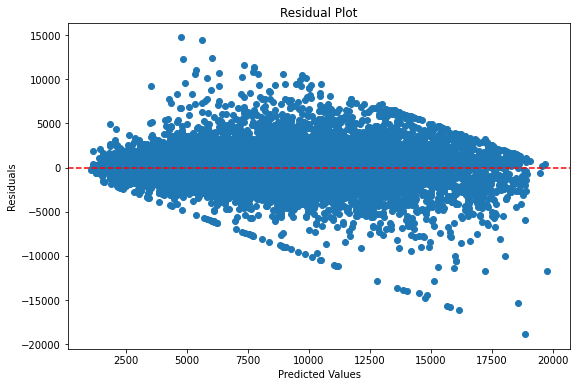

In [56]:
plt.figure(figsize=(9, 6))

knn_baseline_residuals = y_test - knn_baseline_pred
plt.scatter(knn_baseline_pred, knn_baseline_residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color="r", linestyle="--")
plt.title("Residual Plot")
plt.show()

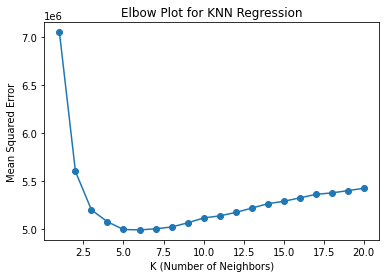

In [57]:
k_values = range(1, 21)  # Adjust the range based on your needs
knn_baseline_mse_values = []

for k in k_values:
    knn_baseline_model = KNeighborsRegressor(n_neighbors=k)
    knn_baseline_model.fit(X_train, y_train)
    knn_baseline_predictions = knn_baseline_model.predict(X_test)
    knn_baseline_mse = mean_squared_error(y_test, knn_baseline_predictions)
    knn_baseline_mse_values.append(knn_baseline_mse)

# Plot the elbow curve
plt.plot(k_values, knn_baseline_mse_values, marker="o")
plt.xlabel("K (Number of Neighbors)")
plt.ylabel("Mean Squared Error")
plt.title("Elbow Plot for KNN Regression")
plt.show()

In [26]:
hyperparameters_knn = {
    "n_neighbors": [3, 5, 9, 15],
    "weights" : ["uniform", "distance"],
    "algorithm":["ball_tree", "kd_tree", "brute", "auto"],
    "p":[1, 2],
}

# create an instance of the grid search object
grid_search_knn = GridSearchCV(
    knn_model_baseline, 
    hyperparameters_knn, 
    cv=10, 
    n_jobs=-1,
    scoring="neg_mean_squared_error",
    verbose=3
)

# conduct grid search over the parameter space
start_time = time.time()

grid_search_knn.fit(X_train, y_train)

duration = time.time() - start_time

# show best parameter configuration found for regressor
knn_best_parameters = grid_search_knn.best_params_
print("\n", knn_best_parameters)
print(f"Time taken in minutes: {duration / 60}")

Fitting 10 folds for each of 64 candidates, totalling 640 fits

 {'algorithm': 'brute', 'n_neighbors': 15, 'p': 1, 'weights': 'distance'}
Time taken in minutes: 176.25515161752702


In [27]:
knn_tuned_model = grid_search_knn.best_estimator_
knn_tuned_pred = knn_tuned_model.predict(X_test)

knn_tuned_scores = get_result_metrics(y_test, knn_tuned_pred)

score_data_tuned["K Nearest-Neighbour Regressor"] = knn_tuned_scores

print("R2 score - K Nearest-Neighbour Regression (Tuned):", knn_tuned_scores[0])
print("Mean squared error - K Nearest-Neighbour Regression (Tuned):", knn_tuned_scores[2])
print("Mean absolute error - K Nearest-Neighbour Regression (Tuned):", knn_tuned_scores[3])
print("Root mean squared error - K Nearest-Neighbour Regression (Tuned):", knn_tuned_scores[4])

[CV 3/10] END algorithm=ball_tree, n_neighbors=3, p=1, weights=uniform;, score=-5305869.034 total time= 2.5min
[CV 5/10] END algorithm=ball_tree, n_neighbors=3, p=1, weights=distance;, score=-5429476.699 total time= 2.3min
[CV 4/10] END algorithm=ball_tree, n_neighbors=3, p=2, weights=uniform;, score=-5006401.350 total time= 2.8min
[CV 2/10] END algorithm=ball_tree, n_neighbors=3, p=2, weights=distance;, score=-5205666.270 total time= 2.8min
[CV 10/10] END algorithm=ball_tree, n_neighbors=3, p=2, weights=distance;, score=-5693731.637 total time= 2.8min
[CV 8/10] END algorithm=ball_tree, n_neighbors=5, p=1, weights=uniform;, score=-4983084.797 total time= 2.4min
[CV 5/10] END algorithm=ball_tree, n_neighbors=5, p=1, weights=distance;, score=-5143505.750 total time= 2.4min
[CV 4/10] END algorithm=ball_tree, n_neighbors=5, p=2, weights=uniform;, score=-4892206.099 total time= 3.0min
[CV 2/10] END algorithm=ball_tree, n_neighbors=5, p=2, weights=distance;, score=-4907601.484 total time= 3.

[CV 1/10] END algorithm=ball_tree, n_neighbors=3, p=1, weights=uniform;, score=-5360011.193 total time= 2.4min
[CV 1/10] END algorithm=ball_tree, n_neighbors=3, p=1, weights=distance;, score=-5283023.938 total time= 2.3min
[CV 9/10] END algorithm=ball_tree, n_neighbors=3, p=1, weights=distance;, score=-5080435.214 total time= 2.3min
[CV 8/10] END algorithm=ball_tree, n_neighbors=3, p=2, weights=uniform;, score=-5148665.209 total time= 2.8min
[CV 5/10] END algorithm=ball_tree, n_neighbors=3, p=2, weights=distance;, score=-5430250.814 total time= 2.8min
[CV 4/10] END algorithm=ball_tree, n_neighbors=5, p=1, weights=uniform;, score=-4857723.084 total time= 2.4min
[CV 1/10] END algorithm=ball_tree, n_neighbors=5, p=1, weights=distance;, score=-5048375.903 total time= 2.4min
[CV 9/10] END algorithm=ball_tree, n_neighbors=5, p=1, weights=distance;, score=-4744307.317 total time= 2.4min
[CV 8/10] END algorithm=ball_tree, n_neighbors=5, p=2, weights=uniform;, score=-5019714.200 total time= 3.0

[CV 6/10] END algorithm=ball_tree, n_neighbors=3, p=1, weights=uniform;, score=-5056678.325 total time= 2.4min
[CV 9/10] END algorithm=ball_tree, n_neighbors=3, p=1, weights=uniform;, score=-5069914.221 total time= 2.3min
[CV 7/10] END algorithm=ball_tree, n_neighbors=3, p=1, weights=distance;, score=-5687885.531 total time= 2.3min
[CV 6/10] END algorithm=ball_tree, n_neighbors=3, p=2, weights=uniform;, score=-5045735.589 total time= 2.8min
[CV 3/10] END algorithm=ball_tree, n_neighbors=3, p=2, weights=distance;, score=-5343219.798 total time= 2.8min
[CV 1/10] END algorithm=ball_tree, n_neighbors=5, p=1, weights=uniform;, score=-5193552.587 total time= 2.4min
[CV 9/10] END algorithm=ball_tree, n_neighbors=5, p=1, weights=uniform;, score=-4837021.107 total time= 2.4min
[CV 7/10] END algorithm=ball_tree, n_neighbors=5, p=1, weights=distance;, score=-5450122.575 total time= 2.4min
[CV 5/10] END algorithm=ball_tree, n_neighbors=5, p=2, weights=uniform;, score=-5150960.183 total time= 3.0mi

[CV 7/10] END algorithm=ball_tree, n_neighbors=3, p=1, weights=uniform;, score=-5388445.316 total time= 2.5min
[CV 6/10] END algorithm=ball_tree, n_neighbors=3, p=1, weights=distance;, score=-5188977.004 total time= 2.2min
[CV 8/10] END algorithm=ball_tree, n_neighbors=3, p=1, weights=distance;, score=-5139837.064 total time= 2.3min
[CV 5/10] END algorithm=ball_tree, n_neighbors=3, p=2, weights=uniform;, score=-5388264.512 total time= 2.8min
[CV 4/10] END algorithm=ball_tree, n_neighbors=3, p=2, weights=distance;, score=-4990376.764 total time= 2.8min
[CV 3/10] END algorithm=ball_tree, n_neighbors=5, p=1, weights=uniform;, score=-5187229.350 total time= 2.4min
[CV 2/10] END algorithm=ball_tree, n_neighbors=5, p=1, weights=distance;, score=-4877811.186 total time= 2.4min
[CV 10/10] END algorithm=ball_tree, n_neighbors=5, p=1, weights=distance;, score=-5351358.151 total time= 2.4min
[CV 7/10] END algorithm=ball_tree, n_neighbors=5, p=2, weights=uniform;, score=-5295771.565 total time= 3.

[CV 2/10] END algorithm=ball_tree, n_neighbors=3, p=1, weights=uniform;, score=-5253734.619 total time= 2.4min
[CV 10/10] END algorithm=ball_tree, n_neighbors=3, p=1, weights=uniform;, score=-5534431.265 total time= 2.3min
[CV 10/10] END algorithm=ball_tree, n_neighbors=3, p=1, weights=distance;, score=-5701253.685 total time= 2.3min
[CV 7/10] END algorithm=ball_tree, n_neighbors=3, p=2, weights=uniform;, score=-5431292.362 total time= 2.9min
[CV 6/10] END algorithm=ball_tree, n_neighbors=3, p=2, weights=distance;, score=-5157811.389 total time= 2.8min
[CV 2/10] END algorithm=ball_tree, n_neighbors=5, p=1, weights=uniform;, score=-4957844.811 total time= 2.4min
[CV 10/10] END algorithm=ball_tree, n_neighbors=5, p=1, weights=uniform;, score=-5239753.567 total time= 2.4min
[CV 8/10] END algorithm=ball_tree, n_neighbors=5, p=1, weights=distance;, score=-4875588.779 total time= 2.4min
[CV 6/10] END algorithm=ball_tree, n_neighbors=5, p=2, weights=uniform;, score=-4982266.979 total time= 2.

[CV 4/10] END algorithm=ball_tree, n_neighbors=3, p=1, weights=uniform;, score=-4936893.910 total time= 2.4min
[CV 3/10] END algorithm=ball_tree, n_neighbors=3, p=1, weights=distance;, score=-5319994.456 total time= 2.3min
[CV 3/10] END algorithm=ball_tree, n_neighbors=3, p=2, weights=uniform;, score=-5340641.337 total time= 2.8min
[CV 1/10] END algorithm=ball_tree, n_neighbors=3, p=2, weights=distance;, score=-5239324.277 total time= 2.8min
[CV 9/10] END algorithm=ball_tree, n_neighbors=3, p=2, weights=distance;, score=-5107265.484 total time= 2.8min
[CV 7/10] END algorithm=ball_tree, n_neighbors=5, p=1, weights=uniform;, score=-5253713.349 total time= 2.4min
[CV 6/10] END algorithm=ball_tree, n_neighbors=5, p=1, weights=distance;, score=-4875029.401 total time= 2.4min
[CV 2/10] END algorithm=ball_tree, n_neighbors=5, p=2, weights=uniform;, score=-4977344.692 total time= 3.0min
[CV 10/10] END algorithm=ball_tree, n_neighbors=5, p=2, weights=uniform;, score=-5209018.244 total time= 3.0

[CV 8/10] END algorithm=ball_tree, n_neighbors=3, p=1, weights=uniform;, score=-5138468.901 total time= 2.4min
[CV 2/10] END algorithm=ball_tree, n_neighbors=3, p=1, weights=distance;, score=-5199799.433 total time= 2.3min
[CV 1/10] END algorithm=ball_tree, n_neighbors=3, p=2, weights=uniform;, score=-5308206.866 total time= 2.8min
[CV 9/10] END algorithm=ball_tree, n_neighbors=3, p=2, weights=uniform;, score=-5101282.922 total time= 2.8min
[CV 7/10] END algorithm=ball_tree, n_neighbors=3, p=2, weights=distance;, score=-5719215.996 total time= 2.9min
[CV 5/10] END algorithm=ball_tree, n_neighbors=5, p=1, weights=uniform;, score=-5132750.322 total time= 2.4min
[CV 4/10] END algorithm=ball_tree, n_neighbors=5, p=1, weights=distance;, score=-4692080.417 total time= 2.4min
[CV 3/10] END algorithm=ball_tree, n_neighbors=5, p=2, weights=uniform;, score=-5174362.874 total time= 3.0min
[CV 1/10] END algorithm=ball_tree, n_neighbors=5, p=2, weights=distance;, score=-5031449.457 total time= 3.0m

R2 score - K Nearest-Neighbour Regression (Tuned): 0.74772
Mean squared error - K Nearest-Neighbour Regression (Tuned): 4824612.67819
Mean absolute error - K Nearest-Neighbour Regression (Tuned): 1480.93674
Root mean squared error - K Nearest-Neighbour Regression (Tuned): 2196.50010


## XG Boost

In [30]:
# Baseline Model

xgb_model_baseline = XGBRegressor()
xgb_model_baseline.fit(X_train, y_train)

xgb_baseline_pred = xgb_model_baseline.predict(X_test)

xgb_baseline_scores = get_result_metrics(y_test, xgb_baseline_pred)

score_data_baseline["XG Boost Regressor"] = xgb_baseline_scores

print("R2 score - XG Boost Regression (Baseline):", xgb_baseline_scores[0])
print("Mean squared error - XG Boost Regression (Baseline):", xgb_baseline_scores[2])
print("Mean absolute error - XG Boost Regression (Baseline):", xgb_baseline_scores[3])
print("Root mean squared error - XG Boost Regression (Baseline):", xgb_baseline_scores[4])


R2 score - XG Boost Regression (Baseline): 0.79332
Mean squared error - XG Boost Regression (Baseline): 3952612.81208
Mean absolute error - XG Boost Regression (Baseline): 1373.65604
Root mean squared error - XG Boost Regression (Baseline): 1988.11791


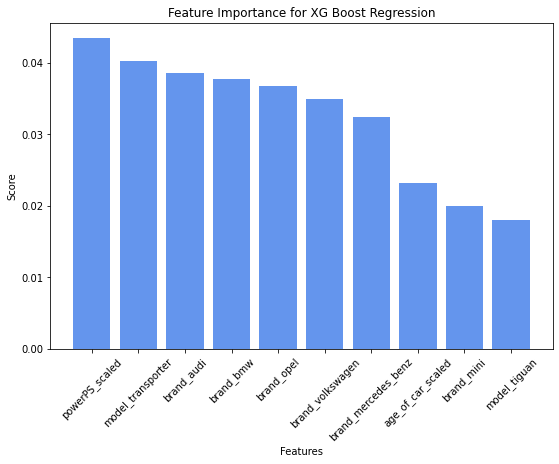

In [48]:
# Taking only top 10 features
xgb_feature_importances = xgb_model_baseline.feature_importances_
features_names = used_cars_features.columns

sorted_index = np.argsort(xgb_feature_importances)[::-1][:10]

xgb_feature_importances_top_10 = xgb_feature_importances[sorted_index]
feature_names_top_10 = np.array(features_names)[sorted_index]

plt.figure(figsize=(9, 6))
plt.bar(range(len(xgb_feature_importances_top_10)), xgb_feature_importances_top_10, align="center", color="cornflowerblue")
plt.xticks(range(len(xgb_feature_importances_top_10)), np.array(feature_names_top_10), rotation=45)
plt.xlabel("Features")
plt.ylabel("Score")
plt.title("Feature Importance for XG Boost Regression")
plt.show()

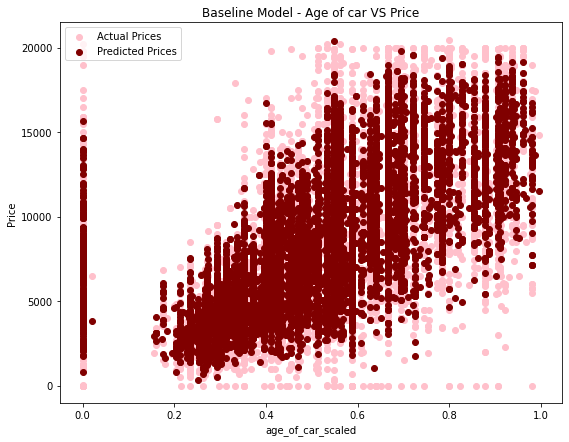

In [52]:
# Baseline Model - Lets visualize how our model predicts price of a car when visualize with only one feature

plt.figure(figsize=(9, 7))
plt.scatter(X_test["powerPS_scaled"], y_test, color="pink", label="Actual Prices")
plt.scatter(X_test["powerPS_scaled"], xgb_baseline_pred, color="maroon", label="Predicted Prices")
plt.title("Baseline Model - Age of car VS Price")
plt.xlabel("age_of_car_scaled")
plt.ylabel("Price")
plt.legend()
plt.show()

In [31]:
hyperparameters_xgb = {
    "objective": ["reg:squarederror", "reg:squaredlogerror", "reg:absoluteerror"],
    "learning_rate" : [0.3, 0.4, 0.04, 0.5],
    "max_depth":[3, 6, 9],
    "alpha":[0, 1, 3, 5],
    "n_estimators": [50, 100, 125, 150]
}

# create an instance of the grid search object
grid_search_xgb = GridSearchCV(
    xgb_model_baseline, 
    hyperparameters_xgb, 
    cv=10, 
    n_jobs=-1,
    scoring="neg_mean_squared_error",
    verbose=3
)

# conduct grid search over the parameter space
start_time = time.time()

grid_search_xgb.fit(X_train, y_train)

duration = time.time() - start_time

# show best parameter configuration found for regressor
xgb_best_parameters = grid_search_xgb.best_params_
print("\n", xgb_best_parameters)
print(f"Time taken in minutes: {duration / 60}")

Fitting 10 folds for each of 576 candidates, totalling 5760 fits
[CV 4/10] END alpha=0, learning_rate=0.3, max_depth=3, n_estimators=50, objective=reg:squarederror;, score=-4514523.668 total time=  39.7s
[CV 4/10] END alpha=0, learning_rate=0.3, max_depth=3, n_estimators=50, objective=reg:squaredlogerror;, score=-80793539.396 total time=  17.4s
[CV 1/10] END alpha=0, learning_rate=0.3, max_depth=3, n_estimators=50, objective=reg:absoluteerror;, score=nan total time=   1.2s
[CV 3/10] END alpha=0, learning_rate=0.3, max_depth=3, n_estimators=50, objective=reg:absoluteerror;, score=nan total time=   1.4s
[CV 5/10] END alpha=0, learning_rate=0.3, max_depth=3, n_estimators=50, objective=reg:absoluteerror;, score=nan total time=   1.4s
[CV 7/10] END alpha=0, learning_rate=0.3, max_depth=3, n_estimators=50, objective=reg:absoluteerror;, score=nan total time=   1.3s
[CV 9/10] END alpha=0, learning_rate=0.3, max_depth=3, n_estimators=50, objective=reg:absoluteerror;, score=nan total time=   1.2

[CV 8/10] END alpha=0, learning_rate=0.5, max_depth=6, n_estimators=150, objective=reg:squaredlogerror;, score=-81625377.605 total time=  42.9s
[CV 4/10] END alpha=0, learning_rate=0.5, max_depth=9, n_estimators=50, objective=reg:squarederror;, score=-3865301.731 total time= 1.6min
[CV 2/10] END alpha=0, learning_rate=0.5, max_depth=9, n_estimators=50, objective=reg:squaredlogerror;, score=-81192081.510 total time=  15.8s
[CV 6/10] END alpha=0, learning_rate=0.5, max_depth=9, n_estimators=50, objective=reg:squaredlogerror;, score=-77974480.904 total time=  16.1s
[CV 10/10] END alpha=0, learning_rate=0.5, max_depth=9, n_estimators=50, objective=reg:squaredlogerror;, score=-81405765.349 total time=  15.3s
[CV 4/10] END alpha=0, learning_rate=0.5, max_depth=9, n_estimators=100, objective=reg:squarederror;, score=-3835264.033 total time= 3.2min
[CV 2/10] END alpha=0, learning_rate=0.5, max_depth=9, n_estimators=100, objective=reg:squaredlogerror;, score=-81192081.510 total time=  29.2s
[CV

[CV 10/10] END alpha=3, learning_rate=0.3, max_depth=6, n_estimators=150, objective=reg:absoluteerror;, score=nan total time=   1.2s[CV 7/10] END alpha=0, learning_rate=0.3, max_depth=3, n_estimators=50, objective=reg:squarederror;, score=-4679921.335 total time=  39.6s
[CV 1/10] END alpha=0, learning_rate=0.3, max_depth=3, n_estimators=50, objective=reg:squaredlogerror;, score=-80386574.671 total time=  17.5s
[CV 9/10] END alpha=0, learning_rate=0.3, max_depth=3, n_estimators=50, objective=reg:squaredlogerror;, score=-81069968.936 total time=  17.1s
[CV 5/10] END alpha=0, learning_rate=0.3, max_depth=3, n_estimators=100, objective=reg:squarederror;, score=-4240143.185 total time= 1.2min
[CV 4/10] END alpha=0, learning_rate=0.3, max_depth=3, n_estimators=100, objective=reg:squaredlogerror;, score=-80793539.396 total time=  31.5s
[CV 10/10] END alpha=0, learning_rate=0.3, max_depth=3, n_estimators=100, objective=reg:squaredlogerror;, score=-81314048.064 total time=  31.3s
[CV 7/10] END 

[CV 4/10] END alpha=3, learning_rate=0.3, max_depth=9, n_estimators=50, objective=reg:absoluteerror;, score=nan total time=   1.5s[CV 6/10] END alpha=0, learning_rate=0.3, max_depth=3, n_estimators=50, objective=reg:squarederror;, score=-4512404.800 total time=  39.8s
[CV 6/10] END alpha=0, learning_rate=0.3, max_depth=3, n_estimators=50, objective=reg:squaredlogerror;, score=-77884907.441 total time=  17.2s
[CV 8/10] END alpha=0, learning_rate=0.3, max_depth=3, n_estimators=50, objective=reg:squaredlogerror;, score=-81533693.047 total time=  17.1s
[CV 4/10] END alpha=0, learning_rate=0.3, max_depth=3, n_estimators=100, objective=reg:squarederror;, score=-4261438.549 total time= 1.2min
[CV 3/10] END alpha=0, learning_rate=0.3, max_depth=3, n_estimators=100, objective=reg:squaredlogerror;, score=-81263058.839 total time=  31.4s
[CV 9/10] END alpha=0, learning_rate=0.3, max_depth=3, n_estimators=100, objective=reg:squaredlogerror;, score=-81069968.936 total time=  31.4s
[CV 6/10] END alp

[CV 4/10] END alpha=3, learning_rate=0.3, max_depth=9, n_estimators=50, objective=reg:squarederror;, score=-3833192.475 total time= 1.7min
[CV 2/10] END alpha=3, learning_rate=0.3, max_depth=9, n_estimators=50, objective=reg:squaredlogerror;, score=-81100813.918 total time=  17.0s
[CV 6/10] END alpha=3, learning_rate=0.3, max_depth=9, n_estimators=50, objective=reg:squaredlogerror;, score=-77884907.441 total time=  16.6s
[CV 9/10] END alpha=3, learning_rate=0.3, max_depth=9, n_estimators=50, objective=reg:squaredlogerror;, score=-81069968.936 total time=  16.6s
[CV 3/10] END alpha=3, learning_rate=0.3, max_depth=9, n_estimators=100, objective=reg:squarederror;, score=-3868037.317 total time= 3.4min
[CV 1/10] END alpha=3, learning_rate=0.3, max_depth=9, n_estimators=100, objective=reg:squaredlogerror;, score=-80386574.671 total time=  31.2s
[CV 7/10] END alpha=3, learning_rate=0.3, max_depth=9, n_estimators=100, objective=reg:squaredlogerror;, score=-81641746.200 total time=  31.0s
[CV 

[CV 8/10] END alpha=1, learning_rate=0.3, max_depth=6, n_estimators=125, objective=reg:absoluteerror;, score=nan total time=   1.4s
[CV 2/10] END alpha=1, learning_rate=0.3, max_depth=6, n_estimators=150, objective=reg:squarederror;, score=-3721223.163 total time= 3.8min
[CV 9/10] END alpha=1, learning_rate=0.3, max_depth=6, n_estimators=150, objective=reg:squarederror;, score=-3562616.856 total time= 3.8min
[CV 9/10] END alpha=1, learning_rate=0.3, max_depth=9, n_estimators=50, objective=reg:squarederror;, score=-3562956.707 total time= 1.9min
[CV 8/10] END alpha=1, learning_rate=0.3, max_depth=9, n_estimators=100, objective=reg:squarederror;, score=-3796981.867 total time= 3.8min
[CV 8/10] END alpha=1, learning_rate=0.3, max_depth=9, n_estimators=100, objective=reg:squaredlogerror;, score=-81533693.047 total time=  34.6s
[CV 5/10] END alpha=1, learning_rate=0.3, max_depth=9, n_estimators=100, objective=reg:absoluteerror;, score=nan total time=   1.6s
[CV 9/10] END alpha=1, learning_r

[CV 5/10] END alpha=3, learning_rate=0.4, max_depth=6, n_estimators=125, objective=reg:squarederror;, score=-3868930.110 total time= 2.9min[CV 2/10] END alpha=0, learning_rate=0.3, max_depth=3, n_estimators=50, objective=reg:squarederror;, score=-4469046.271 total time=  39.7s
[CV 2/10] END alpha=0, learning_rate=0.3, max_depth=3, n_estimators=50, objective=reg:squaredlogerror;, score=-81100813.918 total time=  17.2s
[CV 7/10] END alpha=0, learning_rate=0.3, max_depth=3, n_estimators=50, objective=reg:squaredlogerror;, score=-81641746.200 total time=  17.0s
[CV 3/10] END alpha=0, learning_rate=0.3, max_depth=3, n_estimators=100, objective=reg:squarederror;, score=-4262020.591 total time= 1.2min
[CV 1/10] END alpha=0, learning_rate=0.3, max_depth=3, n_estimators=100, objective=reg:squaredlogerror;, score=-80386574.671 total time=  31.4s
[CV 7/10] END alpha=0, learning_rate=0.3, max_depth=3, n_estimators=100, objective=reg:squaredlogerror;, score=-81641746.200 total time=  31.3s
[CV 3/10

[CV 10/10] END alpha=1, learning_rate=0.4, max_depth=9, n_estimators=100, objective=reg:squarederror;, score=-3868214.359 total time= 4.2min
[CV 8/10] END alpha=1, learning_rate=0.4, max_depth=9, n_estimators=125, objective=reg:squarederror;, score=-3813290.624 total time= 5.2min
[CV 6/10] END alpha=1, learning_rate=0.4, max_depth=9, n_estimators=150, objective=reg:squarederror;, score=-3612149.560 total time= 6.0min
[CV 4/10] END alpha=1, learning_rate=0.4, max_depth=9, n_estimators=150, objective=reg:squaredlogerror;, score=-80611579.860 total time=  50.1s
[CV 8/10] END alpha=1, learning_rate=0.4, max_depth=9, n_estimators=150, objective=reg:squaredlogerror;, score=-81351437.861 total time=  50.8s
[CV 3/10] END alpha=1, learning_rate=0.4, max_depth=9, n_estimators=150, objective=reg:absoluteerror;, score=nan total time=   1.4s
[CV 5/10] END alpha=1, learning_rate=0.4, max_depth=9, n_estimators=150, objective=reg:absoluteerror;, score=nan total time=   1.6s
[CV 7/10] END alpha=1, lear

[CV 1/10] END alpha=3, learning_rate=0.4, max_depth=6, n_estimators=50, objective=reg:absoluteerror;, score=nan total time=   1.4s[CV 8/10] END alpha=0, learning_rate=0.3, max_depth=3, n_estimators=50, objective=reg:squarederror;, score=-4565829.263 total time=  39.8s
[CV 5/10] END alpha=0, learning_rate=0.3, max_depth=3, n_estimators=50, objective=reg:squaredlogerror;, score=-82798998.331 total time=  18.2s
[CV 2/10] END alpha=0, learning_rate=0.3, max_depth=3, n_estimators=50, objective=reg:absoluteerror;, score=nan total time=   1.3s
[CV 4/10] END alpha=0, learning_rate=0.3, max_depth=3, n_estimators=50, objective=reg:absoluteerror;, score=nan total time=   1.4s
[CV 6/10] END alpha=0, learning_rate=0.3, max_depth=3, n_estimators=50, objective=reg:absoluteerror;, score=nan total time=   1.3s
[CV 8/10] END alpha=0, learning_rate=0.3, max_depth=3, n_estimators=50, objective=reg:absoluteerror;, score=nan total time=   1.3s
[CV 10/10] END alpha=0, learning_rate=0.3, max_depth=3, n_estima

[CV 7/10] END alpha=3, learning_rate=0.4, max_depth=3, n_estimators=50, objective=reg:squarederror;, score=-4456747.545 total time=  36.5s
[CV 3/10] END alpha=3, learning_rate=0.4, max_depth=3, n_estimators=50, objective=reg:squaredlogerror;, score=-81080527.484 total time=  16.8s
[CV 7/10] END alpha=3, learning_rate=0.4, max_depth=3, n_estimators=50, objective=reg:squaredlogerror;, score=-81459295.257 total time=  15.8s
[CV 3/10] END alpha=3, learning_rate=0.4, max_depth=3, n_estimators=100, objective=reg:squarederror;, score=-4226466.717 total time= 1.2min
[CV 9/10] END alpha=3, learning_rate=0.4, max_depth=3, n_estimators=100, objective=reg:squarederror;, score=-4090286.208 total time= 1.2min
[CV 9/10] END alpha=3, learning_rate=0.4, max_depth=3, n_estimators=100, objective=reg:absoluteerror;, score=nan total time=   1.2s
[CV 5/10] END alpha=3, learning_rate=0.4, max_depth=3, n_estimators=125, objective=reg:squarederror;, score=-4098636.511 total time= 1.5min
[CV 3/10] END alpha=3, 

[CV 1/10] END alpha=0, learning_rate=0.5, max_depth=3, n_estimators=50, objective=reg:absoluteerror;, score=nan total time=   1.2s
[CV 4/10] END alpha=0, learning_rate=0.5, max_depth=3, n_estimators=50, objective=reg:absoluteerror;, score=nan total time=   1.1s
[CV 8/10] END alpha=0, learning_rate=0.5, max_depth=3, n_estimators=50, objective=reg:absoluteerror;, score=nan total time=   1.3s
[CV 1/10] END alpha=0, learning_rate=0.5, max_depth=3, n_estimators=100, objective=reg:squarederror;, score=-4165315.635 total time= 1.4min
[CV 9/10] END alpha=0, learning_rate=0.5, max_depth=3, n_estimators=100, objective=reg:squarederror;, score=-4001708.421 total time= 1.4min
[CV 1/10] END alpha=0, learning_rate=0.5, max_depth=3, n_estimators=125, objective=reg:squarederror;, score=-4112479.029 total time= 1.7min
[CV 9/10] END alpha=0, learning_rate=0.5, max_depth=3, n_estimators=125, objective=reg:squarederror;, score=-3933235.720 total time= 1.7min
[CV 7/10] END alpha=0, learning_rate=0.5, max_d

[CV 9/10] END alpha=3, learning_rate=0.4, max_depth=6, n_estimators=100, objective=reg:absoluteerror;, score=nan total time=   1.2s[CV 1/10] END alpha=0, learning_rate=0.3, max_depth=3, n_estimators=50, objective=reg:squarederror;, score=-4658613.549 total time=  39.6s
[CV 9/10] END alpha=0, learning_rate=0.3, max_depth=3, n_estimators=50, objective=reg:squarederror;, score=-4402374.760 total time=  36.9s
[CV 8/10] END alpha=0, learning_rate=0.3, max_depth=3, n_estimators=100, objective=reg:squarederror;, score=-4242244.708 total time= 1.2min
[CV 6/10] END alpha=0, learning_rate=0.3, max_depth=3, n_estimators=100, objective=reg:squaredlogerror;, score=-77884907.441 total time=  31.2s
[CV 1/10] END alpha=0, learning_rate=0.3, max_depth=3, n_estimators=100, objective=reg:absoluteerror;, score=nan total time=   1.2s
[CV 3/10] END alpha=0, learning_rate=0.3, max_depth=3, n_estimators=100, objective=reg:absoluteerror;, score=nan total time=   1.3s
[CV 5/10] END alpha=0, learning_rate=0.3, m

[CV 10/10] END alpha=3, learning_rate=0.4, max_depth=6, n_estimators=150, objective=reg:squarederror;, score=-3878253.963 total time= 3.4min
 {'alpha': 0, 'learning_rate': 0.3, 'max_depth': 9, 'n_estimators': 150, 'objective': 'reg:squarederror'}
Time taken in minutes: 756.5051597118378


In [32]:
xgb_tuned_model = grid_search_xgb.best_estimator_
xgb_tuned_pred = xgb_tuned_model.predict(X_test)

xgb_tuned_scores = get_result_metrics(y_test, xgb_tuned_pred)

score_data_tuned["XG Boost Regressor"] = xgb_tuned_scores

print("R2 score - XG Boost Regression (Tuned):", xgb_tuned_scores[0])
print("Mean squared error -  XG Boost Regression (Tuned):", xgb_tuned_scores[2])
print("Mean absolute error -  XG Boost Regression (Tuned):", xgb_tuned_scores[3])
print("Root mean squared error -  XG Boost Regression (Tuned):", xgb_tuned_scores[4])

R2 score - XG Boost Regression (Tuned): 0.80092
Mean squared error -  XG Boost Regression (Tuned): 3807169.91636
Mean absolute error -  XG Boost Regression (Tuned): 1321.86584
Root mean squared error -  XG Boost Regression (Tuned): 1951.19705


## Light GBM

In [33]:
# Baseline Model
from lightgbm import LGBMRegressor


lightgbm_model_baseline = LGBMRegressor()
lightgbm_model_baseline.fit(X_train, y_train)

lightgbm_baseline_pred = lightgbm_model_baseline.predict(X_test)

lightgbm_baseline_scores = get_result_metrics(y_test, lightgbm_baseline_pred)

score_data_baseline["Light GBM Regressor"] = lightgbm_baseline_scores

print("R2 score - Light GBM Regression (Baseline):", lightgbm_baseline_scores[0])
print("Mean squared error - Light GBM Regression (Baseline):", lightgbm_baseline_scores[2])
print("Mean absolute error - Light GBM Regression (Baseline):", lightgbm_baseline_scores[3])
print("Root mean squared error - Light GBM Regression (Baseline):", lightgbm_baseline_scores[4])

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003080 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 623
[LightGBM] [Info] Number of data points in the train set: 45697, number of used features: 216
[LightGBM] [Info] Start training from score 8275.360133
R2 score - Light GBM Regression (Baseline): 0.78662
Mean squared error - Light GBM Regression (Baseline): 4080735.83947
Mean absolute error - Light GBM Regression (Baseline): 1402.38410
Root mean squared error - Light GBM Regression (Baseline): 2020.08313


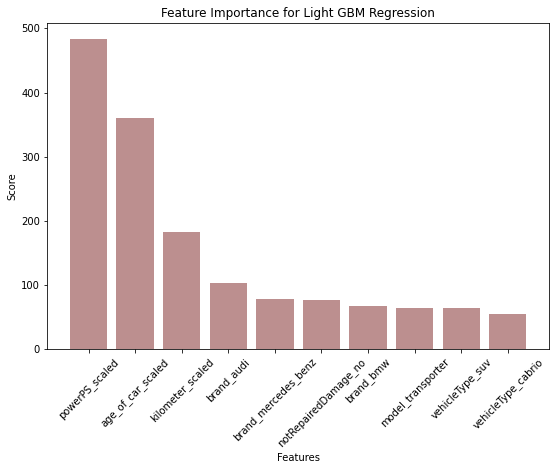

In [58]:
# Taking only top 10 features
lightgbm_feature_importances = lightgbm_model_baseline.feature_importances_
features_names = used_cars_features.columns

sorted_index = np.argsort(lightgbm_feature_importances)[::-1][:10]

lightgbm_feature_importances_top_10 = lightgbm_feature_importances[sorted_index]
feature_names_top_10 = np.array(features_names)[sorted_index]

plt.figure(figsize=(9, 6))
plt.bar(range(len(lightgbm_feature_importances_top_10)), lightgbm_feature_importances_top_10, align="center", color="rosybrown")
plt.xticks(range(len(lightgbm_feature_importances_top_10)), np.array(feature_names_top_10), rotation=45)
plt.xlabel("Features")
plt.ylabel("Score")
plt.title("Feature Importance for Light GBM Regression")
plt.show()

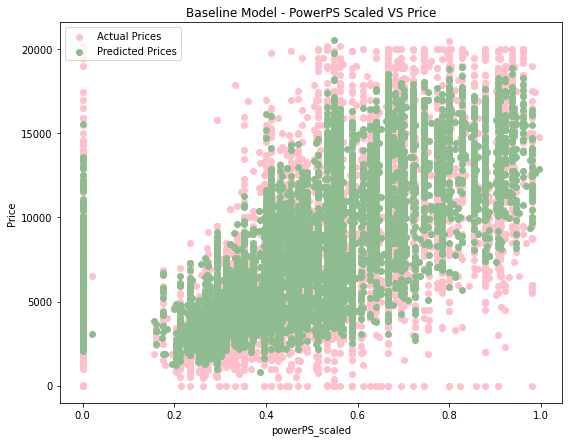

In [60]:
plt.figure(figsize=(9, 7))
plt.scatter(X_test["powerPS_scaled"], y_test, color="pink", label="Actual Prices")
plt.scatter(X_test["powerPS_scaled"], lightgbm_baseline_pred, color="darkseagreen", label="Predicted Prices")
plt.title("Baseline Model - PowerPS Scaled VS Price")
plt.xlabel("powerPS_scaled")
plt.ylabel("Price")
plt.legend()
plt.show()

In [35]:
hyperparameters_lightgbm = {
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth":[3, 6, 9],
    "num_iterations": [50, 75, 100, 125]
}

# create an instance of the grid search object
grid_search_lightgbm = GridSearchCV(
    lightgbm_model_baseline, 
    hyperparameters_lightgbm, 
    cv=10, 
    n_jobs=-1,
    scoring="neg_mean_squared_error",
    verbose=3
)

# conduct grid search over the parameter space
start_time = time.time()

grid_search_lightgbm.fit(X_train, y_train)

duration = time.time() - start_time

# show best parameter configuration found for regressor
lightgbm_best_parameters = grid_search_lightgbm.best_params_
print("\n", lightgbm_best_parameters)
print(f"Time taken in minutes: {duration / 60}")

Fitting 10 folds for each of 36 candidates, totalling 360 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001251 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 623
[LightGBM] [Info] Number of data points in the train set: 45697, number of used features: 216
[LightGBM] [Info] Start training from score 8275.360133
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

 {'learning_rate': 0.1, 'max_depth': 9, 'num_iterations': 125}
Time taken in minutes: 2.1540356516838073


In [36]:
lightgbm_tuned_model = grid_search_lightgbm.best_estimator_
lightgbm_tuned_pred = lightgbm_tuned_model.predict(X_test)

lightgbm_tuned_scores = get_result_metrics(y_test, lightgbm_tuned_pred)

score_data_tuned["Light GBM Regressor"] = lightgbm_tuned_scores

print("R2 score - Light GBM Regression (Tuned):", lightgbm_tuned_scores[0])
print("Mean squared error - Light GBM Regression (Tuned):", lightgbm_tuned_scores[2])
print("Mean absolute error - Light GBM Regression (Tuned):", lightgbm_tuned_scores[3])
print("Root mean squared error - Light GBM Regression (Tuned):", lightgbm_tuned_scores[4])

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
R2 score - Light GBM Regression (Tuned): 0.78766
Mean squared error - Light GBM Regression (Tuned): 4060852.03245
Mean absolute error - Light GBM Regression (Tuned): 1398.63288
Root mean squared error - Light GBM Regression (Tuned): 2015.15559
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009665 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 41127, number of used features: 213
[LightGBM] [Info] Start training from score 8279.513920
[CV 1/10] END learning_rate=0.01, max_depth=3, num_iterations=50;, score=-12575227.661 total time=   1.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024540 seconds.
You can

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.112300 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 41128, number of used features: 214
[LightGBM] [Info] Start training from score 8273.124100
[CV 8/10] END learning_rate=0.01, max_depth=3, num_iterations=50;, score=-12711562.160 total time=   1.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006335 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 616
[LightGBM] [Info] Number of data points in the train set: 41127, number of used features: 214
[LightGBM] [Info] Start training from score 8263.329589
[CV 5/10] END learning_rate=0.01, max_depth=3, num_iterations=75;, score=-10

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009884 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 614
[LightGBM] [Info] Number of data points in the train set: 41127, number of used features: 213
[LightGBM] [Info] Start training from score 8271.706738
[CV 3/10] END learning_rate=0.01, max_depth=3, num_iterations=50;, score=-12360986.317 total time=   1.5s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019203 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 613
[LightGBM] [Info] Number of data points in the train set: 41127, number of used features: 213
[LightGBM] [Info] Start training from score 8277.651470
[CV 2/10] END learning_rate=0.01, max_depth=3, num_iterations=75;, score=-10

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010003 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 613
[LightGBM] [Info] Number of data points in the train set: 41127, number of used features: 213
[LightGBM] [Info] Start training from score 8294.919566
[CV 6/10] END learning_rate=0.01, max_depth=3, num_iterations=50;, score=-12307645.427 total time=   1.5s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010941 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 614
[LightGBM] [Info] Number of data points in the train set: 41127, number of used features: 213
[LightGBM] [Info] Start training from score 8271.706738
[CV 3/10] END learning_rate=0.01, max_depth=3, num_iterations=75;, score=-10

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010125 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 609
[LightGBM] [Info] Number of data points in the train set: 41127, number of used features: 212
[LightGBM] [Info] Start training from score 8272.226056
[CV 7/10] END learning_rate=0.01, max_depth=3, num_iterations=50;, score=-12744936.309 total time=   1.4s
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.028572 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 608
[LightGBM] [Info] Number of data points in the train set: 41128, number of used features: 210
[LightGBM] [Info] Start training from score 8273.033602
[CV 10/10] END learning_rate=0.01, max_depth=3, num_iterations=50;, score=-12604556.451 total time=   1.2s
[LightGBM] [Info] Auto-choosing r

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params

## Lasso Regression

In [61]:
score_data_baseline.head()

,Decision Tree Regressor,Random Forest Regressor,K Nearest-Neighbour Regressor,XG Boost Regressor,Light GBM Regressor
R2_Score,0.72380,0.78830,0.73898,0.79332,0.78662
Accuracy,72.37958,78.82967,73.89779,79.33195,78.66200
Mean_Squared_Error,5282202.79548,4048670.12597,4991855.80661,3952612.81208,4080735.83947
Mean_Absolute_Error,1512.30791,1360.23983,1548.47373,1373.65604,1402.38410
Root_MSE,2298.30433,2012.13074,2234.24614,1988.11791,2020.08313


In [64]:
for i in score_data_baseline.columns:
    score_data_baseline[i] = score_data_baseline[i].astype(float)

model_accuracy_baseline = score_data_baseline.loc["Accuracy"]

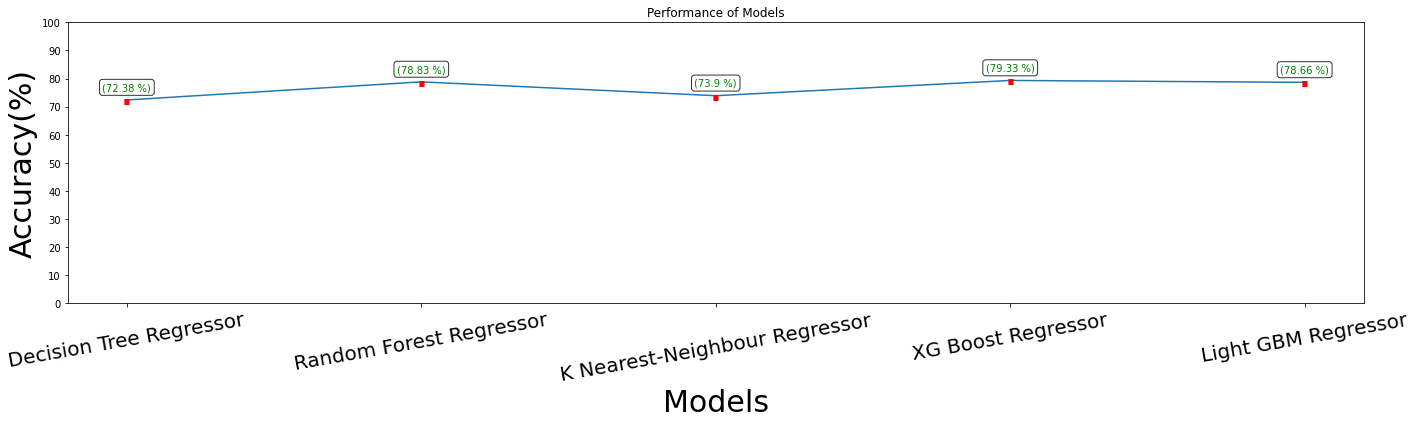

In [68]:
x=list(range(len(model_accuracy_baseline)))
y=list(range(0,101,10))
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
plt.figure(figsize=(20,6))
plt.plot(model_accuracy_baseline)
plt.yticks(y)
plt.xticks(fontsize=20)
plt.xticks(rotation = (10))
plt.xlabel("Models",fontsize=30)
plt.ylabel("Accuracy(%)",fontsize=30)
plt.title("Performance of Models")
for a,b in zip(x,y):
    b=model_accuracy_baseline[a]
    val="("+str(round(model_accuracy_baseline[a],2))+" %)"
    plt.text(a, b+4.5, val,horizontalalignment='center',verticalalignment='center',color='green',bbox=props)
    plt.text(a, b+3.5, '.',horizontalalignment='center',verticalalignment='center',color='red',fontsize=50)
plt.tight_layout()
plt.savefig('Overall-Performance.jpg',dpi=600)
plt.show()

In [69]:
for i in score_data_tuned.columns:
    score_data_tuned[i] = score_data_tuned[i].astype(float)

model_accuracy_tuned = score_data_tuned.loc["Accuracy"]

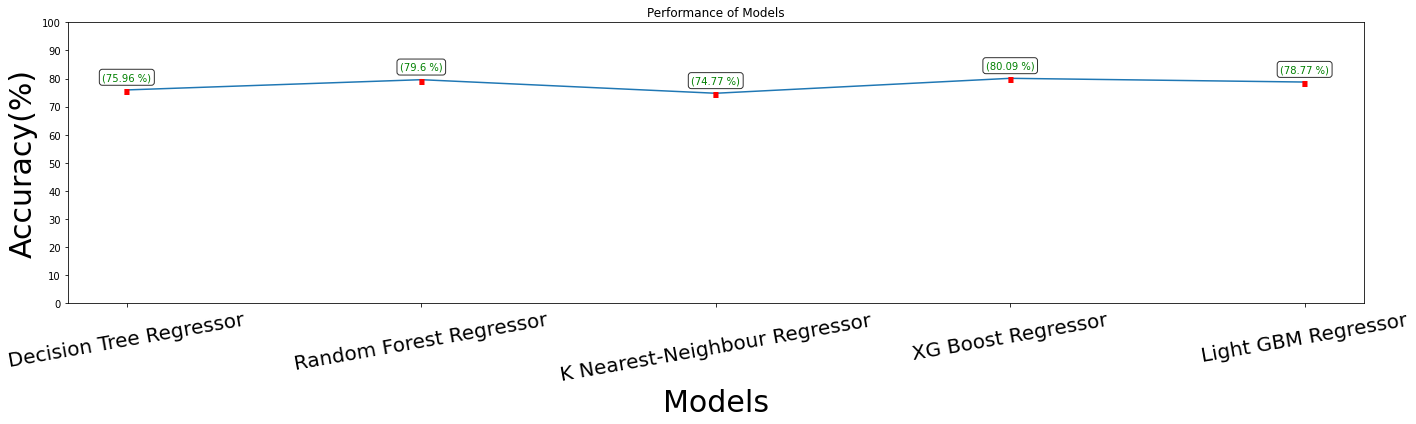

In [70]:
x=list(range(len(model_accuracy_tuned)))
y=list(range(0,101,10))
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
plt.figure(figsize=(20,6))
plt.plot(model_accuracy_tuned)
plt.yticks(y)
plt.xticks(fontsize=20)
plt.xticks(rotation = (10))
plt.xlabel("Models",fontsize=30)
plt.ylabel("Accuracy(%)",fontsize=30)
plt.title("Performance of Models")
for a,b in zip(x,y):
    b=model_accuracy_tuned[a]
    val="("+str(round(model_accuracy_tuned[a],2))+" %)"
    plt.text(a, b+4.5, val,horizontalalignment='center',verticalalignment='center',color='green',bbox=props)
    plt.text(a, b+3.5, '.',horizontalalignment='center',verticalalignment='center',color='red',fontsize=50)
plt.tight_layout()
plt.savefig('Overall-Performance.jpg',dpi=600)
plt.show()

In [62]:
score_data_tuned.head()

,Decision Tree Regressor,Random Forest Regressor,K Nearest-Neighbour Regressor,XG Boost Regressor,Light GBM Regressor
R2_Score,0.75961,0.79604,0.74772,0.80092,0.78766
Accuracy,75.96091,79.60415,74.77230,80.09246,78.76597
Mean_Squared_Error,4597298.98101,3900555.67034,4824612.67819,3807169.91636,4060852.03245
Mean_Absolute_Error,1485.00519,1345.05489,1480.93674,1321.86584,1398.63288
Root_MSE,2144.13129,1974.98245,2196.50010,1951.19705,2015.15559
